In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import os
os.getcwd()

'/content/sample_data'

In [ ]:
# importing packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# if running in Google colab - you should upload the Project2_training.csv to the sample_data folder available when you start the notebook


# reading training file
df = pd.read_csv('Project2_training.csv')

# normalize stock and call prices in relation to the option's strike price
df['Stock Price'] = df['Stock Price']/df['Strike Price']
df['Call Price']  = df['Call Price'] /df['Strike Price']

# split data into training and testing sets
n = 3000
n_train =  (int)(0.8 * n)

# select training set and define independent and dependent variable (call price)
train = df[0:n_train]
X_train = train[['Stock Price', 'Maturity', 'Dividends', 'Volatility', 'Risk-free']].values
y_train = train['Call Price'].values

# select testing set and define independent and dependent variable (call price)
test = df[n_train+1:n]
X_test = test[['Stock Price', 'Maturity', 'Dividends', 'Volatility', 'Risk-free']].values
y_test = test['Call Price'].values

[Errno 2] No such file or directory: 'sample_data'
/content/sample_data
anscombe.json*                mnist_test.csv         README.md*
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  Project2_training.csv


Load Tensor Flow Keras

In [ ]:
# to build the neural we will use Keras due to its friendly API
# https://keras.io/api/

# importing Keras classes to build the neural networks
from keras.models import Sequential # https://keras.io/api/models/sequential/

# keras provides layers api to construct the neural network
from keras.layers import Dense, Dropout, Activation, LeakyReLU, ReLU #https://keras.io/api/layers/

from keras import backend
def custom_activation(x):
    return backend.exp(x)

In [ ]:
from numpy.random import seed
import tensorflow as tf
import random
seed(0)
tf.random.set_seed(0)
random.seed(0)

Single Neural Network

Epoch 1/100
34/34 - 1s - loss: 0.1314 - val_loss: 0.0542 - 525ms/epoch - 15ms/step
Epoch 2/100
34/34 - 0s - loss: 0.0509 - val_loss: 0.0514 - 88ms/epoch - 3ms/step
Epoch 3/100
34/34 - 0s - loss: 0.0465 - val_loss: 0.0449 - 74ms/epoch - 2ms/step
Epoch 4/100
34/34 - 0s - loss: 0.0409 - val_loss: 0.0380 - 89ms/epoch - 3ms/step
Epoch 5/100
34/34 - 0s - loss: 0.0340 - val_loss: 0.0299 - 80ms/epoch - 2ms/step
Epoch 6/100
34/34 - 0s - loss: 0.0263 - val_loss: 0.0217 - 74ms/epoch - 2ms/step
Epoch 7/100
34/34 - 0s - loss: 0.0186 - val_loss: 0.0141 - 95ms/epoch - 3ms/step
Epoch 8/100
34/34 - 0s - loss: 0.0121 - val_loss: 0.0086 - 73ms/epoch - 2ms/step
Epoch 9/100
34/34 - 0s - loss: 0.0075 - val_loss: 0.0054 - 102ms/epoch - 3ms/step
Epoch 10/100
34/34 - 0s - loss: 0.0049 - val_loss: 0.0039 - 91ms/epoch - 3ms/step
Epoch 11/100
34/34 - 0s - loss: 0.0036 - val_loss: 0.0029 - 82ms/epoch - 2ms/step
Epoch 12/100
34/34 - 0s - loss: 0.0029 - val_loss: 0.0024 - 81ms/epoch - 2ms/step
Epoch 13/100
34/34 - 0

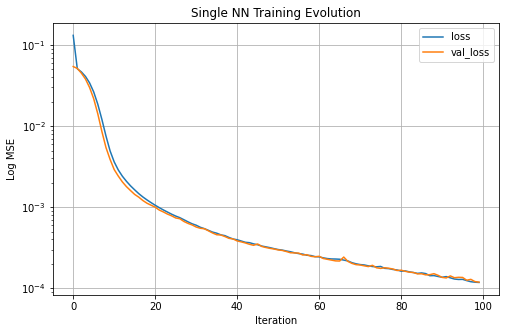

In [ ]:
# for this NN we will define it with 300 neurons
nodes = 300
# initialize the mode as Sequential class - the next steps we will add layers to it 
model = Sequential()

# to add a layer we call the add method from model (Sequential) and pass as argument the Dense class
# https://keras.io/api/layers/core_layers/dense/
model.add(Dense(nodes, activation='relu', input_dim=X_train.shape[1])) # activation = 'relu', 'tanh', 'sigmoid'

# since we want to predict a single value we add one additional layer with one neuron 
model.add(Dense(1))
# we will use our customized activation function
model.add(Activation(custom_activation))


# https://keras.io/api/models/model_training_apis/

# compile the model
model.compile(loss='mse', optimizer='adam') # optimizer = 'rmsprop', 'sgd', 'adam'

# fit the model
history = model.fit(X_train, y_train, batch_size=64, epochs=100, validation_split=0.1, verbose=2,
                          validation_data=(X_test, y_test))
print()
# print the model parameters
print(model.summary())

# plot the model learning history
pd.DataFrame(history.history).plot(figsize=(8,5), logy=True)
plt.title('Single NN Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

Deep Neural Network (DNN)

Epoch 1/100
5/5 - 1s - loss: 0.4912 - val_loss: 0.2309 - 541ms/epoch - 108ms/step
Epoch 2/100
5/5 - 0s - loss: 0.1919 - val_loss: 0.0930 - 40ms/epoch - 8ms/step
Epoch 3/100
5/5 - 0s - loss: 0.0837 - val_loss: 0.0590 - 40ms/epoch - 8ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0571 - val_loss: 0.0594 - 39ms/epoch - 8ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0560 - val_loss: 0.0638 - 42ms/epoch - 8ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0579 - val_loss: 0.0647 - 43ms/epoch - 9ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0573 - val_loss: 0.0620 - 43ms/epoch - 9ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0544 - val_loss: 0.0570 - 45ms/epoch - 9ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0499 - val_loss: 0.0508 - 41ms/epoch - 8ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0449 - val_loss: 0.0445 - 45ms/epoch - 9ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0398 - val_loss: 0.0384 - 47ms/epoch - 9ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0346 - val_loss: 0.0320 - 45ms/epoch - 9ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0290 - val_los

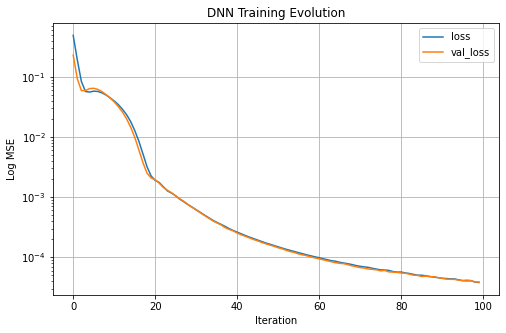

In [ ]:
# for the DNN we will continue to use 300 neurons - but instead of a single layer of 300 neurons, we will use 3 layers of 100 neurons each

# number of neurons per layer
nodes2 = 100

# initialize our new model as sequential class
model2 = Sequential()

# add the first layer of 100 neurons - for the first layer you must declare the number of features through input_dim arguments
model2.add(Dense(nodes2, activation='relu', input_dim=X_train.shape[1])) # activation = 'relu', 'tanh', 'sigmoid'

# add second layer of 100 neurons - no need to declare the input dimensions, keras does that automatically
model2.add(Dense(nodes2, activation='relu'))

# add third layer of 100 neurons 
model2.add(Dense(nodes2, activation='relu'))

# output layer is the same as the single NN
model2.add(Dense(1))
model2.add(Activation(custom_activation))


# compile and fit the model
model2.compile(loss='mse', optimizer='adam') # optimizer = 'rmsprop', 'sgd', 'adam'
history = model2.fit(X_train, y_train, batch_size=512, epochs=100, validation_split=0.1, verbose=2,
                          validation_data=(X_test, y_test))
print()
print(model2.summary())


pd.DataFrame(history.history).plot(figsize=(8,5), logy=True)
plt.title('DNN Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

Epoch 1/100
5/5 - 1s - loss: 0.4887 - val_loss: 0.2967 - 698ms/epoch - 140ms/step
Epoch 2/100
5/5 - 0s - loss: 0.2556 - val_loss: 0.1335 - 42ms/epoch - 8ms/step
Epoch 3/100
5/5 - 0s - loss: 0.1144 - val_loss: 0.0649 - 44ms/epoch - 9ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0611 - val_loss: 0.0601 - 39ms/epoch - 8ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0575 - val_loss: 0.0677 - 41ms/epoch - 8ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0616 - val_loss: 0.0700 - 44ms/epoch - 9ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0616 - val_loss: 0.0666 - 44ms/epoch - 9ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0577 - val_loss: 0.0595 - 44ms/epoch - 9ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0517 - val_loss: 0.0516 - 43ms/epoch - 9ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0465 - val_loss: 0.0457 - 44ms/epoch - 9ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0429 - val_loss: 0.0415 - 48ms/epoch - 10ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0392 - val_loss: 0.0368 - 44ms/epoch - 9ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0341 - val_lo

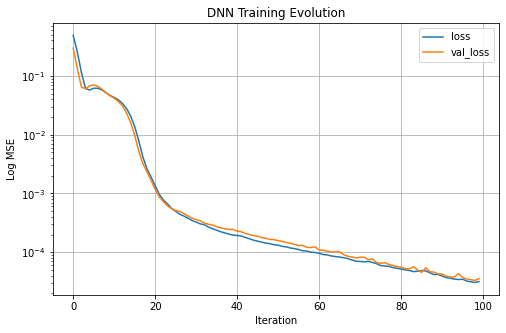

In [ ]:
# for the DNN we will continue to use 300 neurons - we will use 6 layers of 50 neurons each

# number of neurons per layer
nodes2_2 = 50

# initialize our new model as sequential class
model2_2 = Sequential()

# add the first layer of 100 neurons - for the first layer you must declare the number of features through input_dim arguments
model2_2.add(Dense(nodes2_2, activation='relu', input_dim=X_train.shape[1])) # activation = 'relu', 'tanh', 'sigmoid'

for i in range(5):
  model2_2.add(Dense(nodes2_2, activation='relu'))


# output layer is the same as the single NN
model2_2.add(Dense(1))
model2_2.add(Activation(custom_activation))


# compile and fit the model
model2_2.compile(loss='mse', optimizer='adam') # optimizer = 'rmsprop', 'sgd', 'adam'
history = model2_2.fit(X_train, y_train, batch_size=512, epochs=100, validation_split=0.1, verbose=2,
                          validation_data=(X_test, y_test))
print()
print(model2_2.summary())


pd.DataFrame(history.history).plot(figsize=(8,5), logy=True)
plt.title('DNN Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

New NN structure with 1200 neurons

Epoch 1/100
34/34 - 0s - loss: 0.1402 - val_loss: 0.0583 - 495ms/epoch - 15ms/step
Epoch 2/100
34/34 - 0s - loss: 0.0524 - val_loss: 0.0517 - 92ms/epoch - 3ms/step
Epoch 3/100
34/34 - 0s - loss: 0.0444 - val_loss: 0.0405 - 89ms/epoch - 3ms/step
Epoch 4/100
34/34 - 0s - loss: 0.0339 - val_loss: 0.0277 - 101ms/epoch - 3ms/step
Epoch 5/100
34/34 - 0s - loss: 0.0219 - val_loss: 0.0154 - 87ms/epoch - 3ms/step
Epoch 6/100
34/34 - 0s - loss: 0.0118 - val_loss: 0.0074 - 87ms/epoch - 3ms/step
Epoch 7/100
34/34 - 0s - loss: 0.0060 - val_loss: 0.0040 - 85ms/epoch - 2ms/step
Epoch 8/100
34/34 - 0s - loss: 0.0036 - val_loss: 0.0028 - 77ms/epoch - 2ms/step
Epoch 9/100
34/34 - 0s - loss: 0.0027 - val_loss: 0.0021 - 101ms/epoch - 3ms/step
Epoch 10/100
34/34 - 0s - loss: 0.0021 - val_loss: 0.0018 - 102ms/epoch - 3ms/step
Epoch 11/100
34/34 - 0s - loss: 0.0018 - val_loss: 0.0015 - 90ms/epoch - 3ms/step
Epoch 12/100
34/34 - 0s - loss: 0.0015 - val_loss: 0.0013 - 94ms/epoch - 3ms/step
Epoch 13/100
34/34 -

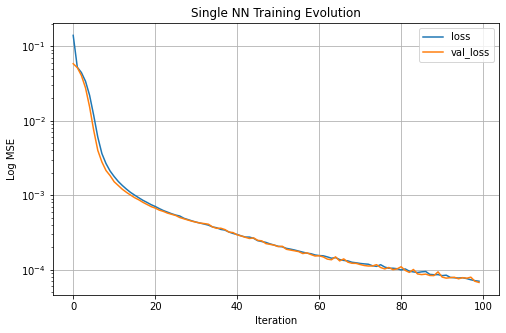

In [ ]:
# for this NN we will define it with 600 neurons
nodes3 = 600

model3 = Sequential()
model3.add(Dense(nodes3, activation='relu', input_dim=X_train.shape[1])) 

# add one additional layer with one neuron 
model3.add(Dense(1))
# we will use our customized activation function
model3.add(Activation(custom_activation))

# compile the model
model3.compile(loss='mse', optimizer='adam') 

# fit the model
history = model3.fit(X_train, y_train, batch_size=64, epochs=100, validation_split=0.1, verbose=2,
                          validation_data=(X_test, y_test))
print()
# print the model parameters
print(model3.summary())

# plot the model learning history
pd.DataFrame(history.history).plot(figsize=(8,5), logy=True)
plt.title('Single NN Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)


Epoch 1/100
5/5 - 1s - loss: 0.4506 - val_loss: 0.2084 - 668ms/epoch - 134ms/step
Epoch 2/100
5/5 - 0s - loss: 0.1497 - val_loss: 0.0635 - 53ms/epoch - 11ms/step
Epoch 3/100
5/5 - 0s - loss: 0.0637 - val_loss: 0.0838 - 49ms/epoch - 10ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0777 - val_loss: 0.0928 - 52ms/epoch - 10ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0816 - val_loss: 0.0902 - 60ms/epoch - 12ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0768 - val_loss: 0.0786 - 56ms/epoch - 11ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0645 - val_loss: 0.0600 - 55ms/epoch - 11ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0522 - val_loss: 0.0501 - 61ms/epoch - 12ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0495 - val_loss: 0.0456 - 65ms/epoch - 13ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0435 - val_loss: 0.0411 - 59ms/epoch - 12ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0380 - val_loss: 0.0353 - 78ms/epoch - 16ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0298 - val_loss: 0.0231 - 58ms/epoch - 12ms/step
Epoch 13/100
5/5 - 0s - loss: 0.020

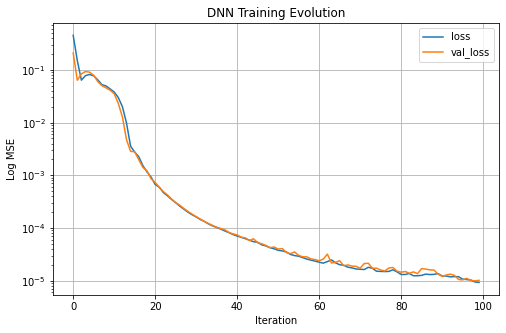

In [ ]:
# for the DNN we will continue to use 600 neurons - but instead of a single layer of 600 neurons, we will use 6 layers of 100 neurons each

# number of neurons per layer
nodes4 = 100
model4 = Sequential()

model4.add(Dense(nodes4, activation='relu', input_dim=X_train.shape[1]))

for i in range(5):
  model4.add(Dense(nodes4, activation='relu'))

# output layer is the same as the single NN
model4.add(Dense(1))
model4.add(Activation(custom_activation))

# compile and fit the model
model4.compile(loss='mse', optimizer='adam') # optimizer = 'rmsprop', 'sgd', 'adam'
history = model4.fit(X_train, y_train, batch_size=512, epochs=100, validation_split=0.1, verbose=2,
                          validation_data=(X_test, y_test))
print()
print(model4.summary())


pd.DataFrame(history.history).plot(figsize=(8,5), logy=True)
plt.title('DNN Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

New NN with different activation functions

Epoch 1/100
34/34 - 0s - loss: 0.0501 - val_loss: 0.0397 - 479ms/epoch - 14ms/step
Epoch 2/100
34/34 - 0s - loss: 0.0369 - val_loss: 0.0369 - 87ms/epoch - 3ms/step
Epoch 3/100
34/34 - 0s - loss: 0.0340 - val_loss: 0.0338 - 87ms/epoch - 3ms/step
Epoch 4/100
34/34 - 0s - loss: 0.0309 - val_loss: 0.0295 - 95ms/epoch - 3ms/step
Epoch 5/100
34/34 - 0s - loss: 0.0274 - val_loss: 0.0256 - 75ms/epoch - 2ms/step
Epoch 6/100
34/34 - 0s - loss: 0.0241 - val_loss: 0.0218 - 89ms/epoch - 3ms/step
Epoch 7/100
34/34 - 0s - loss: 0.0207 - val_loss: 0.0184 - 78ms/epoch - 2ms/step
Epoch 8/100
34/34 - 0s - loss: 0.0177 - val_loss: 0.0152 - 97ms/epoch - 3ms/step
Epoch 9/100
34/34 - 0s - loss: 0.0148 - val_loss: 0.0132 - 101ms/epoch - 3ms/step
Epoch 10/100
34/34 - 0s - loss: 0.0123 - val_loss: 0.0113 - 81ms/epoch - 2ms/step
Epoch 11/100
34/34 - 0s - loss: 0.0102 - val_loss: 0.0085 - 97ms/epoch - 3ms/step
Epoch 12/100
34/34 - 0s - loss: 0.0085 - val_loss: 0.0073 - 79ms/epoch - 2ms/step
Epoch 13/100
34/34 - 0

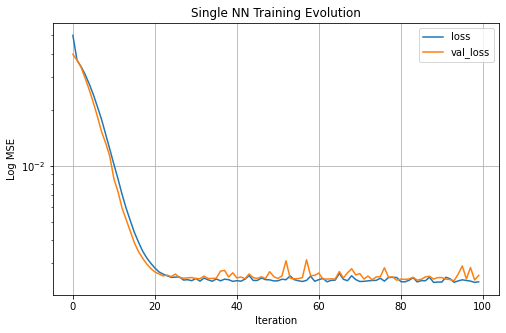

In [ ]:
# SNN with 300 neurons and sigmoid activation
nodes6 = 300
model6 = Sequential()


model6.add(Dense(nodes6, activation='sigmoid', input_dim=X_train.shape[1]))

model6.add(Dense(1))
model6.add(Activation(custom_activation))

model6.compile(loss='mse', optimizer='adam') 

# fit the model
history = model6.fit(X_train, y_train, batch_size=64, epochs=100, validation_split=0.1, verbose=2,
                          validation_data=(X_test, y_test))
print()
# print the model parameters
print(model6.summary())

# plot the model learning history
pd.DataFrame(history.history).plot(figsize=(8,5), logy=True)
plt.title('Single NN Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)


Epoch 1/100
5/5 - 1s - loss: 0.5599 - val_loss: 0.0831 - 549ms/epoch - 110ms/step
Epoch 2/100
5/5 - 0s - loss: 0.0621 - val_loss: 0.0409 - 46ms/epoch - 9ms/step
Epoch 3/100
5/5 - 0s - loss: 0.0407 - val_loss: 0.0493 - 38ms/epoch - 8ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0465 - val_loss: 0.0562 - 41ms/epoch - 8ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0512 - val_loss: 0.0598 - 39ms/epoch - 8ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0534 - val_loss: 0.0610 - 47ms/epoch - 9ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0540 - val_loss: 0.0608 - 41ms/epoch - 8ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0534 - val_loss: 0.0595 - 39ms/epoch - 8ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0522 - val_loss: 0.0576 - 41ms/epoch - 8ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0505 - val_loss: 0.0553 - 40ms/epoch - 8ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0486 - val_loss: 0.0528 - 58ms/epoch - 12ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0466 - val_loss: 0.0503 - 45ms/epoch - 9ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0446 - val_lo

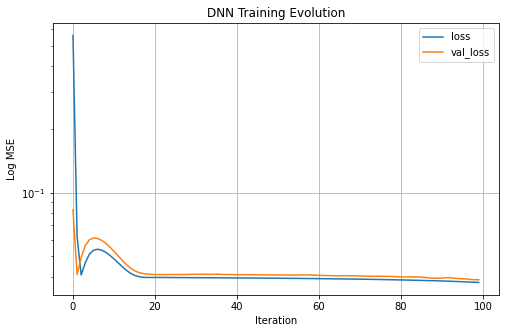

In [ ]:
# DNN with 3 layers of 100 neurons, using Sigmoid activation function
nodes7 = 100
model7 = Sequential()

model7.add(Dense(nodes7, activation='sigmoid', input_dim=X_train.shape[1])) 

model7.add(Dense(nodes7, activation='sigmoid'))
model7.add(Dense(nodes7, activation='sigmoid'))

# output layer is the same as the single NN
model7.add(Dense(1))
model7.add(Activation(custom_activation))


# compile and fit the model
model7.compile(loss='mse', optimizer='adam') # optimizer = 'rmsprop', 'sgd', 'adam'
history = model7.fit(X_train, y_train, batch_size=512, epochs=100, validation_split=0.1, verbose=2,
                          validation_data=(X_test, y_test))
print()
print(model7.summary())


pd.DataFrame(history.history).plot(figsize=(8,5), logy=True)
plt.title('DNN Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

Epoch 1/100
5/5 - 1s - loss: 0.6076 - val_loss: 0.0433 - 541ms/epoch - 108ms/step
Epoch 2/100
5/5 - 0s - loss: 0.0422 - val_loss: 0.0540 - 43ms/epoch - 9ms/step
Epoch 3/100
5/5 - 0s - loss: 0.0521 - val_loss: 0.0664 - 38ms/epoch - 8ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0605 - val_loss: 0.0722 - 37ms/epoch - 7ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0643 - val_loss: 0.0743 - 44ms/epoch - 9ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0654 - val_loss: 0.0742 - 47ms/epoch - 9ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0649 - val_loss: 0.0726 - 48ms/epoch - 10ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0631 - val_loss: 0.0698 - 43ms/epoch - 9ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0604 - val_loss: 0.0660 - 45ms/epoch - 9ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0570 - val_loss: 0.0615 - 41ms/epoch - 8ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0529 - val_loss: 0.0563 - 42ms/epoch - 8ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0487 - val_loss: 0.0509 - 49ms/epoch - 10ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0445 - val_l

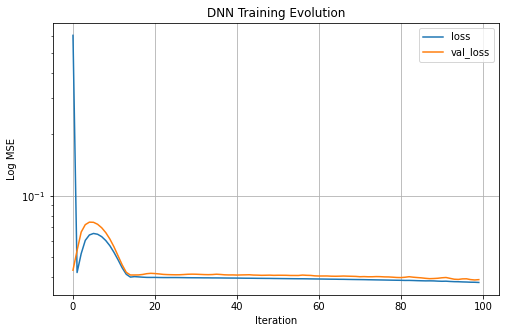

In [ ]:
# DNN with 3 layers of 100 neurons, using  activation function: sigmoid, sigmoid, relu
nodes7_2 = 100
model7_2 = Sequential()

model7_2.add(Dense(nodes7_2, activation='sigmoid', input_dim=X_train.shape[1])) 

model7_2.add(Dense(nodes7_2, activation='sigmoid'))
model7_2.add(Dense(nodes7_2, activation='relu'))

# output layer is the same as the single NN
model7_2.add(Dense(1))
model7_2.add(Activation(custom_activation))


# compile and fit the model
model7_2.compile(loss='mse', optimizer='adam') # optimizer = 'rmsprop', 'sgd', 'adam'
history = model7_2.fit(X_train, y_train, batch_size=512, epochs=100, validation_split=0.1, verbose=2,
                          validation_data=(X_test, y_test))
print()
print(model7_2.summary())


pd.DataFrame(history.history).plot(figsize=(8,5), logy=True)
plt.title('DNN Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

Epoch 1/100
5/5 - 1s - loss: 0.3133 - val_loss: 0.0425 - 563ms/epoch - 113ms/step
Epoch 2/100
5/5 - 0s - loss: 0.0416 - val_loss: 0.0507 - 45ms/epoch - 9ms/step
Epoch 3/100
5/5 - 0s - loss: 0.0485 - val_loss: 0.0596 - 41ms/epoch - 8ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0538 - val_loss: 0.0618 - 44ms/epoch - 9ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0542 - val_loss: 0.0595 - 39ms/epoch - 8ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0515 - val_loss: 0.0543 - 44ms/epoch - 9ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0469 - val_loss: 0.0479 - 45ms/epoch - 9ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0424 - val_loss: 0.0427 - 42ms/epoch - 8ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0401 - val_loss: 0.0410 - 53ms/epoch - 11ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0406 - val_loss: 0.0409 - 45ms/epoch - 9ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0404 - val_loss: 0.0410 - 44ms/epoch - 9ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0398 - val_loss: 0.0417 - 47ms/epoch - 9ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0399 - val_lo

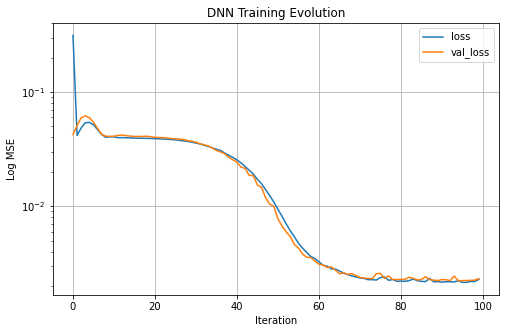

In [ ]:
# DNN with 3 layers of 100 neurons, using  activation function: sigmoid, relu, relu
nodes7_3 = 100
model7_3 = Sequential()

model7_3.add(Dense(nodes7_3, activation='sigmoid', input_dim=X_train.shape[1])) 

model7_3.add(Dense(nodes7_3, activation='relu'))
model7_3.add(Dense(nodes7_3, activation='relu'))

# output layer is the same as the single NN
model7_3.add(Dense(1))
model7_3.add(Activation(custom_activation))


# compile and fit the model
model7_3.compile(loss='mse', optimizer='adam') # optimizer = 'rmsprop', 'sgd', 'adam'
history = model7_3.fit(X_train, y_train, batch_size=512, epochs=100, validation_split=0.1, verbose=2,
                          validation_data=(X_test, y_test))
print()
print(model7_3.summary())


pd.DataFrame(history.history).plot(figsize=(8,5), logy=True)
plt.title('DNN Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

Epoch 1/100
5/5 - 1s - loss: 0.0411 - val_loss: 0.0405 - 536ms/epoch - 107ms/step
Epoch 2/100
5/5 - 0s - loss: 0.0381 - val_loss: 0.0383 - 46ms/epoch - 9ms/step
Epoch 3/100
5/5 - 0s - loss: 0.0348 - val_loss: 0.0326 - 53ms/epoch - 11ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0309 - val_loss: 0.0275 - 45ms/epoch - 9ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0262 - val_loss: 0.0221 - 40ms/epoch - 8ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0204 - val_loss: 0.0152 - 48ms/epoch - 10ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0138 - val_loss: 0.0089 - 44ms/epoch - 9ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0080 - val_loss: 0.0048 - 43ms/epoch - 9ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0043 - val_loss: 0.0031 - 51ms/epoch - 10ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0029 - val_loss: 0.0029 - 55ms/epoch - 11ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0025 - val_loss: 0.0023 - 46ms/epoch - 9ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0020 - val_loss: 0.0018 - 67ms/epoch - 13ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0017 - va

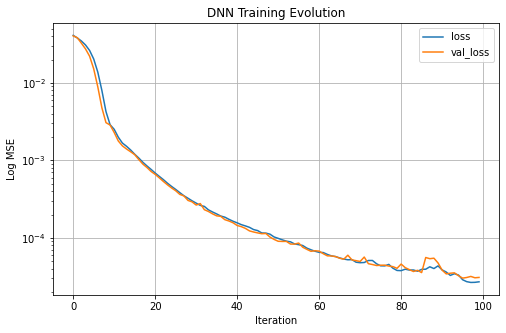

In [ ]:
# DNN with 3 layers of 100 neurons, using  activation function: relu, relu, sigmoid
nodes7_4 = 100
model7_4 = Sequential()

model7_4.add(Dense(nodes7_4, activation='relu', input_dim=X_train.shape[1])) 

model7_4.add(Dense(nodes7_4, activation='relu'))
model7_4.add(Dense(nodes7_4, activation='sigmoid'))

# output layer is the same as the single NN
model7_4.add(Dense(1))
model7_4.add(Activation(custom_activation))


# compile and fit the model
model7_4.compile(loss='mse', optimizer='adam') # optimizer = 'rmsprop', 'sgd', 'adam'
history = model7_4.fit(X_train, y_train, batch_size=512, epochs=100, validation_split=0.1, verbose=2,
                          validation_data=(X_test, y_test))
print()
print(model7_4.summary())


pd.DataFrame(history.history).plot(figsize=(8,5), logy=True)
plt.title('DNN Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

Epoch 1/100
34/34 - 1s - loss: 0.0964 - val_loss: 0.0625 - 507ms/epoch - 15ms/step
Epoch 2/100
34/34 - 0s - loss: 0.0541 - val_loss: 0.0528 - 94ms/epoch - 3ms/step
Epoch 3/100
34/34 - 0s - loss: 0.0464 - val_loss: 0.0431 - 89ms/epoch - 3ms/step
Epoch 4/100
34/34 - 0s - loss: 0.0384 - val_loss: 0.0336 - 91ms/epoch - 3ms/step
Epoch 5/100
34/34 - 0s - loss: 0.0294 - val_loss: 0.0238 - 89ms/epoch - 3ms/step
Epoch 6/100
34/34 - 0s - loss: 0.0207 - val_loss: 0.0156 - 87ms/epoch - 3ms/step
Epoch 7/100
34/34 - 0s - loss: 0.0134 - val_loss: 0.0095 - 92ms/epoch - 3ms/step
Epoch 8/100
34/34 - 0s - loss: 0.0084 - val_loss: 0.0059 - 74ms/epoch - 2ms/step
Epoch 9/100
34/34 - 0s - loss: 0.0055 - val_loss: 0.0041 - 95ms/epoch - 3ms/step
Epoch 10/100
34/34 - 0s - loss: 0.0039 - val_loss: 0.0032 - 78ms/epoch - 2ms/step
Epoch 11/100
34/34 - 0s - loss: 0.0032 - val_loss: 0.0028 - 81ms/epoch - 2ms/step
Epoch 12/100
34/34 - 0s - loss: 0.0028 - val_loss: 0.0027 - 96ms/epoch - 3ms/step
Epoch 13/100
34/34 - 0s

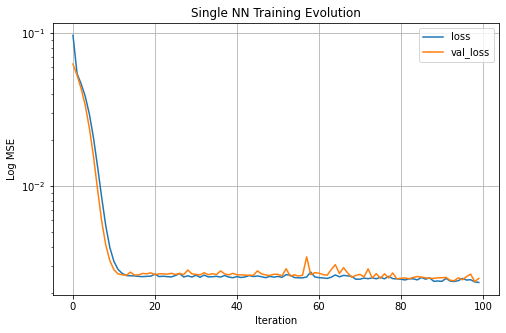

In [ ]:
# SNN with 300 neurons and tanh activation
nodes8 = 300
model8 = Sequential()


model8.add(Dense(nodes8, activation='tanh', input_dim=X_train.shape[1]))

model8.add(Dense(1))
model8.add(Activation(custom_activation))

model8.compile(loss='mse', optimizer='adam') 

# fit the model
history = model8.fit(X_train, y_train, batch_size=64, epochs=100, validation_split=0.1, verbose=2,
                          validation_data=(X_test, y_test))
print()
# print the model parameters
print(model8.summary())

# plot the model learning history
pd.DataFrame(history.history).plot(figsize=(8,5), logy=True)
plt.title('Single NN Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

Epoch 1/100
5/5 - 1s - loss: 0.4331 - val_loss: 0.0635 - 526ms/epoch - 105ms/step
Epoch 2/100
5/5 - 0s - loss: 0.0612 - val_loss: 0.0750 - 39ms/epoch - 8ms/step
Epoch 3/100
5/5 - 0s - loss: 0.0696 - val_loss: 0.0840 - 39ms/epoch - 8ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0751 - val_loss: 0.0870 - 39ms/epoch - 8ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0767 - val_loss: 0.0868 - 40ms/epoch - 8ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0758 - val_loss: 0.0843 - 41ms/epoch - 8ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0731 - val_loss: 0.0797 - 41ms/epoch - 8ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0684 - val_loss: 0.0724 - 40ms/epoch - 8ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0613 - val_loss: 0.0616 - 40ms/epoch - 8ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0516 - val_loss: 0.0477 - 39ms/epoch - 8ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0411 - val_loss: 0.0370 - 44ms/epoch - 9ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0374 - val_loss: 0.0336 - 40ms/epoch - 8ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0341 - val_los

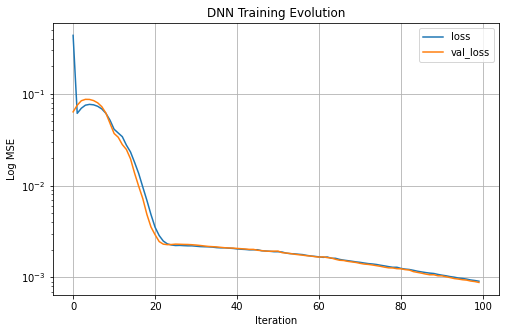

In [ ]:
# DNN with 3 layers of 100 neurons, using tanh activation function
nodes9 = 100
model9 = Sequential()

model9.add(Dense(nodes9, activation='tanh', input_dim=X_train.shape[1])) 

model9.add(Dense(nodes9, activation='tanh'))
model9.add(Dense(nodes9, activation='tanh'))

# output layer is the same as the single NN
model9.add(Dense(1))
model9.add(Activation(custom_activation))


# compile and fit the model
model9.compile(loss='mse', optimizer='adam') # optimizer = 'rmsprop', 'sgd', 'adam'
history = model9.fit(X_train, y_train, batch_size=512, epochs=100, validation_split=0.1, verbose=2,
                          validation_data=(X_test, y_test))
print()
print(model9.summary())


pd.DataFrame(history.history).plot(figsize=(8,5), logy=True)
plt.title('DNN Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

Models with different Parameters

Epoch 1/100
34/34 - 1s - loss: 0.1282 - val_loss: 0.0569 - 543ms/epoch - 16ms/step
Epoch 2/100
34/34 - 0s - loss: 0.0495 - val_loss: 0.0422 - 83ms/epoch - 2ms/step
Epoch 3/100
34/34 - 0s - loss: 0.0316 - val_loss: 0.0211 - 76ms/epoch - 2ms/step
Epoch 4/100
34/34 - 0s - loss: 0.0157 - val_loss: 0.0090 - 76ms/epoch - 2ms/step
Epoch 5/100
34/34 - 0s - loss: 0.0066 - val_loss: 0.0042 - 70ms/epoch - 2ms/step
Epoch 6/100
34/34 - 0s - loss: 0.0037 - val_loss: 0.0028 - 88ms/epoch - 3ms/step
Epoch 7/100
34/34 - 0s - loss: 0.0029 - val_loss: 0.0027 - 87ms/epoch - 3ms/step
Epoch 8/100
34/34 - 0s - loss: 0.0026 - val_loss: 0.0023 - 86ms/epoch - 3ms/step
Epoch 9/100
34/34 - 0s - loss: 0.0024 - val_loss: 0.0023 - 76ms/epoch - 2ms/step
Epoch 10/100
34/34 - 0s - loss: 0.0022 - val_loss: 0.0033 - 72ms/epoch - 2ms/step
Epoch 11/100
34/34 - 0s - loss: 0.0021 - val_loss: 0.0018 - 84ms/epoch - 2ms/step
Epoch 12/100
34/34 - 0s - loss: 0.0020 - val_loss: 0.0019 - 83ms/epoch - 2ms/step
Epoch 13/100
34/34 - 0s

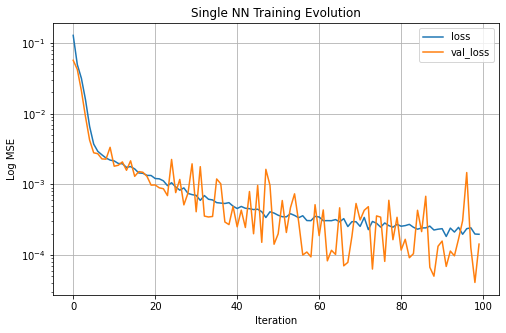

In [ ]:
# SNN with 300 neurons and relu activation and rmsprop optimizer
nodes10 = 300
model10 = Sequential()


model10.add(Dense(nodes10, activation='relu', input_dim=X_train.shape[1]))

model10.add(Dense(1))
model10.add(Activation(custom_activation))

model10.compile(loss='mse', optimizer='rmsprop') 

# fit the model
history = model10.fit(X_train, y_train, batch_size=64, epochs=100, validation_split=0.1, verbose=2,
                          validation_data=(X_test, y_test))
print()
# print the model parameters
print(model10.summary())

# plot the model learning history
pd.DataFrame(history.history).plot(figsize=(8,5), logy=True)
plt.title('Single NN Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)


Epoch 1/100
5/5 - 1s - loss: 0.2417 - val_loss: 0.0755 - 715ms/epoch - 143ms/step
Epoch 2/100
5/5 - 0s - loss: 0.0699 - val_loss: 0.0583 - 41ms/epoch - 8ms/step
Epoch 3/100
5/5 - 0s - loss: 0.0552 - val_loss: 0.0534 - 39ms/epoch - 8ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0496 - val_loss: 0.0469 - 46ms/epoch - 9ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0432 - val_loss: 0.0383 - 40ms/epoch - 8ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0347 - val_loss: 0.0278 - 41ms/epoch - 8ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0250 - val_loss: 0.0222 - 43ms/epoch - 9ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0179 - val_loss: 0.0112 - 43ms/epoch - 9ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0100 - val_loss: 0.0067 - 40ms/epoch - 8ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0097 - val_loss: 0.0210 - 45ms/epoch - 9ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0078 - val_loss: 0.0065 - 47ms/epoch - 9ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0087 - val_loss: 0.0053 - 41ms/epoch - 8ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0058 - val_los

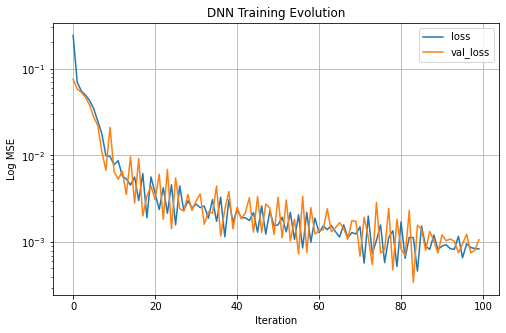

In [ ]:
# DNN with 3 layers of 100 neurons, using relu activation function and rmsprop optimizer
nodes11 = 100
model11 = Sequential()

model11.add(Dense(nodes11, activation='relu', input_dim=X_train.shape[1])) 

model11.add(Dense(nodes11, activation='relu'))
model11.add(Dense(nodes11, activation='relu'))

# output layer is the same as the single NN
model11.add(Dense(1))
model11.add(Activation(custom_activation))


# compile and fit the model
model11.compile(loss='mse', optimizer='rmsprop') # optimizer = 'rmsprop', 'sgd', 'adam'
history = model11.fit(X_train, y_train, batch_size=512, epochs=100, validation_split=0.1, verbose=2,
                          validation_data=(X_test, y_test))
print()
print(model11.summary())


pd.DataFrame(history.history).plot(figsize=(8,5), logy=True)
plt.title('DNN Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)


Epoch 1/100
34/34 - 0s - loss: 0.2178 - val_loss: 0.0795 - 416ms/epoch - 12ms/step
Epoch 2/100
34/34 - 0s - loss: 0.0718 - val_loss: 0.0585 - 75ms/epoch - 2ms/step
Epoch 3/100
34/34 - 0s - loss: 0.0579 - val_loss: 0.0535 - 77ms/epoch - 2ms/step
Epoch 4/100
34/34 - 0s - loss: 0.0532 - val_loss: 0.0515 - 83ms/epoch - 2ms/step
Epoch 5/100
34/34 - 0s - loss: 0.0509 - val_loss: 0.0505 - 77ms/epoch - 2ms/step
Epoch 6/100
34/34 - 0s - loss: 0.0496 - val_loss: 0.0497 - 79ms/epoch - 2ms/step
Epoch 7/100
34/34 - 0s - loss: 0.0485 - val_loss: 0.0490 - 85ms/epoch - 3ms/step
Epoch 8/100
34/34 - 0s - loss: 0.0477 - val_loss: 0.0484 - 78ms/epoch - 2ms/step
Epoch 9/100
34/34 - 0s - loss: 0.0470 - val_loss: 0.0478 - 80ms/epoch - 2ms/step
Epoch 10/100
34/34 - 0s - loss: 0.0463 - val_loss: 0.0472 - 71ms/epoch - 2ms/step
Epoch 11/100
34/34 - 0s - loss: 0.0457 - val_loss: 0.0466 - 81ms/epoch - 2ms/step
Epoch 12/100
34/34 - 0s - loss: 0.0451 - val_loss: 0.0459 - 86ms/epoch - 3ms/step
Epoch 13/100
34/34 - 0s

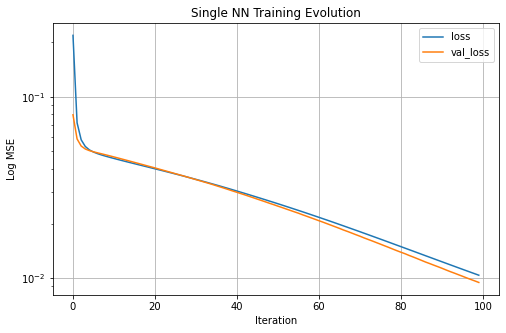

In [ ]:
# SNN with 300 neurons and relu activation and momentum (sgd) optimizer
nodes12 = 300
model12 = Sequential()


model12.add(Dense(nodes12, activation='relu', input_dim=X_train.shape[1]))

model12.add(Dense(1))
model12.add(Activation(custom_activation))

model12.compile(loss='mse', optimizer='sgd') 

# fit the model
history = model12.fit(X_train, y_train, batch_size=64, epochs=100, validation_split=0.1, verbose=2,
                          validation_data=(X_test, y_test))
print()
# print the model parameters
print(model12.summary())

# plot the model learning history
pd.DataFrame(history.history).plot(figsize=(8,5), logy=True)
plt.title('Single NN Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)


Epoch 1/100
5/5 - 0s - loss: 0.5054 - val_loss: 0.2942 - 469ms/epoch - 94ms/step
Epoch 2/100
5/5 - 0s - loss: 0.2785 - val_loss: 0.1991 - 37ms/epoch - 7ms/step
Epoch 3/100
5/5 - 0s - loss: 0.1986 - val_loss: 0.1512 - 35ms/epoch - 7ms/step
Epoch 4/100
5/5 - 0s - loss: 0.1550 - val_loss: 0.1224 - 34ms/epoch - 7ms/step
Epoch 5/100
5/5 - 0s - loss: 0.1276 - val_loss: 0.1035 - 37ms/epoch - 7ms/step
Epoch 6/100
5/5 - 0s - loss: 0.1091 - val_loss: 0.0909 - 38ms/epoch - 8ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0964 - val_loss: 0.0816 - 38ms/epoch - 8ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0868 - val_loss: 0.0749 - 40ms/epoch - 8ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0796 - val_loss: 0.0698 - 48ms/epoch - 10ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0741 - val_loss: 0.0659 - 39ms/epoch - 8ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0697 - val_loss: 0.0629 - 39ms/epoch - 8ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0663 - val_loss: 0.0606 - 37ms/epoch - 7ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0636 - val_los

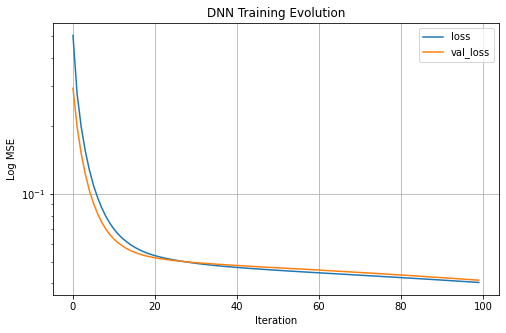

In [ ]:
# DNN with 3 layers of 100 neurons, using relu activation function and momentum (sgd) optimizer
nodes13 = 100
model13 = Sequential()

model13.add(Dense(nodes13, activation='relu', input_dim=X_train.shape[1])) 

model13.add(Dense(nodes13, activation='relu'))
model13.add(Dense(nodes13, activation='relu'))

# output layer is the same as the single NN
model13.add(Dense(1))
model13.add(Activation(custom_activation))


# compile and fit the model
model13.compile(loss='mse', optimizer='sgd') # optimizer = 'rmsprop', 'sgd', 'adam'
history = model13.fit(X_train, y_train, batch_size=512, epochs=100, validation_split=0.1, verbose=2,
                          validation_data=(X_test, y_test))
print()
print(model13.summary())


pd.DataFrame(history.history).plot(figsize=(8,5), logy=True)
plt.title('DNN Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)


Testing different Epochs

Epoch 1/500
34/34 - 0s - loss: 0.2172 - val_loss: 0.0603 - 477ms/epoch - 14ms/step
Epoch 2/500
34/34 - 0s - loss: 0.0554 - val_loss: 0.0555 - 70ms/epoch - 2ms/step
Epoch 3/500
34/34 - 0s - loss: 0.0509 - val_loss: 0.0507 - 70ms/epoch - 2ms/step
Epoch 4/500
34/34 - 0s - loss: 0.0461 - val_loss: 0.0446 - 93ms/epoch - 3ms/step
Epoch 5/500
34/34 - 0s - loss: 0.0401 - val_loss: 0.0372 - 88ms/epoch - 3ms/step
Epoch 6/500
34/34 - 0s - loss: 0.0329 - val_loss: 0.0289 - 75ms/epoch - 2ms/step
Epoch 7/500
34/34 - 0s - loss: 0.0250 - val_loss: 0.0206 - 82ms/epoch - 2ms/step
Epoch 8/500
34/34 - 0s - loss: 0.0178 - val_loss: 0.0137 - 87ms/epoch - 3ms/step
Epoch 9/500
34/34 - 0s - loss: 0.0118 - val_loss: 0.0088 - 89ms/epoch - 3ms/step
Epoch 10/500
34/34 - 0s - loss: 0.0078 - val_loss: 0.0058 - 90ms/epoch - 3ms/step
Epoch 11/500
34/34 - 0s - loss: 0.0053 - val_loss: 0.0041 - 69ms/epoch - 2ms/step
Epoch 12/500
34/34 - 0s - loss: 0.0039 - val_loss: 0.0032 - 102ms/epoch - 3ms/step
Epoch 13/500
34/34 - 0

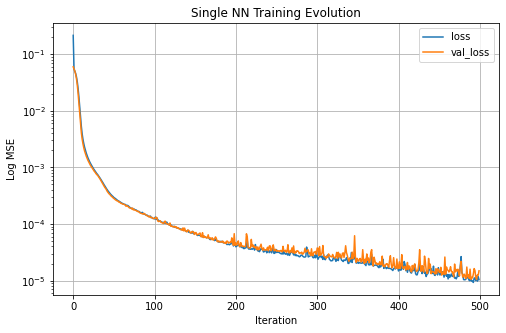

In [ ]:
# SNN with 300 neurons and relu activation and adam optimizer and 500 epochs
nodes14 = 300
model14 = Sequential()


model14.add(Dense(nodes14, activation='relu', input_dim=X_train.shape[1]))

model14.add(Dense(1))
model14.add(Activation(custom_activation))

model14.compile(loss='mse', optimizer='adam') 

# fit the model
history = model14.fit(X_train, y_train, batch_size=64, epochs=500, validation_split=0.1, verbose=2,
                          validation_data=(X_test, y_test))
print()
# print the model parameters
print(model14.summary())

# plot the model learning history
pd.DataFrame(history.history).plot(figsize=(8,5), logy=True)
plt.title('Single NN Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

Epoch 1/500
5/5 - 1s - loss: 0.4968 - val_loss: 0.2451 - 662ms/epoch - 132ms/step
Epoch 2/500
5/5 - 0s - loss: 0.1858 - val_loss: 0.0687 - 53ms/epoch - 11ms/step
Epoch 3/500
5/5 - 0s - loss: 0.0625 - val_loss: 0.0722 - 55ms/epoch - 11ms/step
Epoch 4/500
5/5 - 0s - loss: 0.0698 - val_loss: 0.0875 - 53ms/epoch - 11ms/step
Epoch 5/500
5/5 - 0s - loss: 0.0780 - val_loss: 0.0883 - 56ms/epoch - 11ms/step
Epoch 6/500
5/5 - 0s - loss: 0.0760 - val_loss: 0.0800 - 57ms/epoch - 11ms/step
Epoch 7/500
5/5 - 0s - loss: 0.0667 - val_loss: 0.0646 - 57ms/epoch - 11ms/step
Epoch 8/500
5/5 - 0s - loss: 0.0556 - val_loss: 0.0539 - 59ms/epoch - 12ms/step
Epoch 9/500
5/5 - 0s - loss: 0.0525 - val_loss: 0.0518 - 65ms/epoch - 13ms/step
Epoch 10/500
5/5 - 0s - loss: 0.0504 - val_loss: 0.0492 - 60ms/epoch - 12ms/step
Epoch 11/500
5/5 - 0s - loss: 0.0471 - val_loss: 0.0495 - 58ms/epoch - 12ms/step
Epoch 12/500
5/5 - 0s - loss: 0.0452 - val_loss: 0.0451 - 56ms/epoch - 11ms/step
Epoch 13/500
5/5 - 0s - loss: 0.041

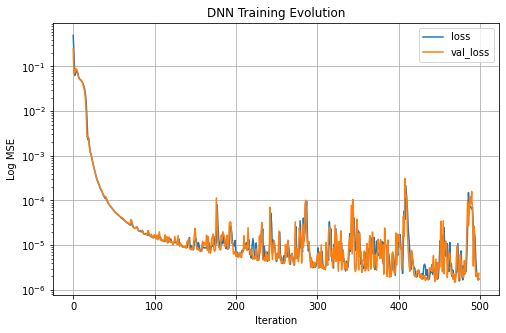

In [ ]:
#DNN with 3 layers, 100 neurons each, relu function, adam optimizer with 500 epochs
nodes15 = 100
model15 = Sequential()

model15.add(Dense(nodes15, activation='relu', input_dim=X_train.shape[1]))

for i in range(5):
  model15.add(Dense(nodes15, activation='relu'))

# output layer is the same as the single NN
model15.add(Dense(1))
model15.add(Activation(custom_activation))

# compile and fit the model
model15.compile(loss='mse', optimizer='adam') # optimizer = 'rmsprop', 'sgd', 'adam'
history = model15.fit(X_train, y_train, batch_size=512, epochs=500, validation_split=0.1, verbose=2,
                          validation_data=(X_test, y_test))
print()
print(model15.summary())


pd.DataFrame(history.history).plot(figsize=(8,5), logy=True)
plt.title('DNN Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

Epoch 1/1000
34/34 - 0s - loss: 0.1481 - val_loss: 0.0538 - 495ms/epoch - 15ms/step
Epoch 2/1000
34/34 - 0s - loss: 0.0505 - val_loss: 0.0509 - 91ms/epoch - 3ms/step
Epoch 3/1000
34/34 - 0s - loss: 0.0453 - val_loss: 0.0430 - 92ms/epoch - 3ms/step
Epoch 4/1000
34/34 - 0s - loss: 0.0383 - val_loss: 0.0344 - 92ms/epoch - 3ms/step
Epoch 5/1000
34/34 - 0s - loss: 0.0298 - val_loss: 0.0246 - 90ms/epoch - 3ms/step
Epoch 6/1000
34/34 - 0s - loss: 0.0208 - val_loss: 0.0157 - 81ms/epoch - 2ms/step
Epoch 7/1000
34/34 - 0s - loss: 0.0131 - val_loss: 0.0092 - 76ms/epoch - 2ms/step
Epoch 8/1000
34/34 - 0s - loss: 0.0079 - val_loss: 0.0055 - 89ms/epoch - 3ms/step
Epoch 9/1000
34/34 - 0s - loss: 0.0050 - val_loss: 0.0038 - 97ms/epoch - 3ms/step
Epoch 10/1000
34/34 - 0s - loss: 0.0036 - val_loss: 0.0030 - 74ms/epoch - 2ms/step
Epoch 11/1000
34/34 - 0s - loss: 0.0029 - val_loss: 0.0024 - 88ms/epoch - 3ms/step
Epoch 12/1000
34/34 - 0s - loss: 0.0025 - val_loss: 0.0021 - 101ms/epoch - 3ms/step
Epoch 13/1

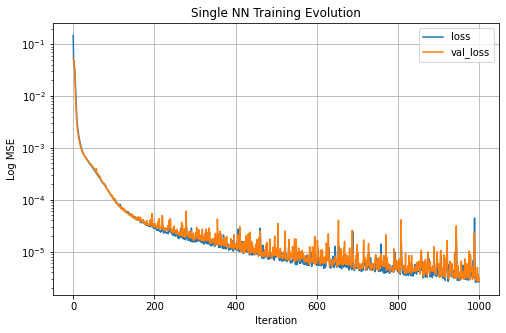

In [ ]:
# SNN with 300 neurons and relu activation and adam optimizer and 1000 epochs
nodes16 = 300
model16 = Sequential()


model16.add(Dense(nodes16, activation='relu', input_dim=X_train.shape[1]))

model16.add(Dense(1))
model16.add(Activation(custom_activation))

model16.compile(loss='mse', optimizer='adam') 

# fit the model
history = model16.fit(X_train, y_train, batch_size=64, epochs=1000, validation_split=0.1, verbose=2,
                          validation_data=(X_test, y_test))
print()
# print the model parameters
print(model16.summary())

# plot the model learning history
pd.DataFrame(history.history).plot(figsize=(8,5), logy=True)
plt.title('Single NN Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

Epoch 1/1000
5/5 - 1s - loss: 0.3989 - val_loss: 0.1450 - 713ms/epoch - 143ms/step
Epoch 2/1000
5/5 - 0s - loss: 0.1043 - val_loss: 0.0648 - 57ms/epoch - 11ms/step
Epoch 3/1000
5/5 - 0s - loss: 0.0657 - val_loss: 0.0870 - 60ms/epoch - 12ms/step
Epoch 4/1000
5/5 - 0s - loss: 0.0791 - val_loss: 0.0920 - 62ms/epoch - 12ms/step
Epoch 5/1000
5/5 - 0s - loss: 0.0800 - val_loss: 0.0862 - 59ms/epoch - 12ms/step
Epoch 6/1000
5/5 - 0s - loss: 0.0722 - val_loss: 0.0703 - 57ms/epoch - 11ms/step
Epoch 7/1000
5/5 - 0s - loss: 0.0575 - val_loss: 0.0532 - 61ms/epoch - 12ms/step
Epoch 8/1000
5/5 - 0s - loss: 0.0518 - val_loss: 0.0499 - 61ms/epoch - 12ms/step
Epoch 9/1000
5/5 - 0s - loss: 0.0482 - val_loss: 0.0460 - 69ms/epoch - 14ms/step
Epoch 10/1000
5/5 - 0s - loss: 0.0433 - val_loss: 0.0436 - 56ms/epoch - 11ms/step
Epoch 11/1000
5/5 - 0s - loss: 0.0381 - val_loss: 0.0329 - 59ms/epoch - 12ms/step
Epoch 12/1000
5/5 - 0s - loss: 0.0296 - val_loss: 0.0220 - 60ms/epoch - 12ms/step
Epoch 13/1000
5/5 - 0s 

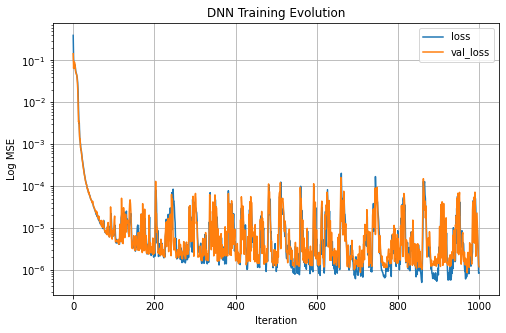

In [ ]:
#DNN with 3 layers, 100 neurons each, relu function, adam optimizer with 1000 epochs
nodes17 = 100
model17 = Sequential()

model17.add(Dense(nodes17, activation='relu', input_dim=X_train.shape[1]))

for i in range(5):
  model17.add(Dense(nodes17, activation='relu'))

# output layer is the same as the single NN
model17.add(Dense(1))
model17.add(Activation(custom_activation))

# compile and fit the model
model17.compile(loss='mse', optimizer='adam') # optimizer = 'rmsprop', 'sgd', 'adam'
history = model17.fit(X_train, y_train, batch_size=512, epochs=1000, validation_split=0.1, verbose=2,
                          validation_data=(X_test, y_test))
print()
print(model17.summary())


pd.DataFrame(history.history).plot(figsize=(8,5), logy=True)
plt.title('DNN Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

# Divide data into Training, Validation and Test set

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from numpy.random import seed
import tensorflow as tf
import random
seed(0)
tf.random.set_seed(0)
random.seed(0)

In [ ]:
# Include option price with and without noise in data set splitting for later BS mean error calculation on test set
X2 = df[['Stock Price', 'Risk-free','Volatility','Maturity','Dividends']]
y2 = df[['Call Price']]


#Divide data into training (60%), testing (20%) and validation (20%) sets

# Divide data into training set and test set(note that random seed is set)
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.4,random_state=100)

# Divide training set into training and validation set
X2_train,X2_val,y2_train,y2_val=train_test_split(X2_train,y2_train,test_size=0.5,random_state=100)

In [ ]:
# Scale features based on Z-Score
scaler = StandardScaler()
scaler.fit(X2_train)


X2_scaled_train = scaler.transform(X2_train)
X2_scaled_val = scaler.transform(X2_val)
X2_scaled_test = scaler.transform(X2_test)

y2_train = np.asarray(y2_train)
y2_val = np.asarray(y2_val)
y2_test = np.asarray(y2_test)

Single Neural Network

Epoch 1/100
12/12 - 0s - loss: 0.3484 - val_loss: 0.1727 - 486ms/epoch - 41ms/step
Epoch 2/100
12/12 - 0s - loss: 0.1140 - val_loss: 0.0706 - 48ms/epoch - 4ms/step
Epoch 3/100
12/12 - 0s - loss: 0.0540 - val_loss: 0.0404 - 46ms/epoch - 4ms/step
Epoch 4/100
12/12 - 0s - loss: 0.0339 - val_loss: 0.0279 - 39ms/epoch - 3ms/step
Epoch 5/100
12/12 - 0s - loss: 0.0247 - val_loss: 0.0210 - 38ms/epoch - 3ms/step
Epoch 6/100
12/12 - 0s - loss: 0.0190 - val_loss: 0.0169 - 42ms/epoch - 3ms/step
Epoch 7/100
12/12 - 0s - loss: 0.0159 - val_loss: 0.0141 - 54ms/epoch - 4ms/step
Epoch 8/100
12/12 - 0s - loss: 0.0136 - val_loss: 0.0123 - 56ms/epoch - 5ms/step
Epoch 9/100
12/12 - 0s - loss: 0.0120 - val_loss: 0.0109 - 56ms/epoch - 5ms/step
Epoch 10/100
12/12 - 0s - loss: 0.0107 - val_loss: 0.0098 - 42ms/epoch - 3ms/step
Epoch 11/100
12/12 - 0s - loss: 0.0098 - val_loss: 0.0090 - 44ms/epoch - 4ms/step
Epoch 12/100
12/12 - 0s - loss: 0.0090 - val_loss: 0.0083 - 38ms/epoch - 3ms/step
Epoch 13/100
12/12 - 0s

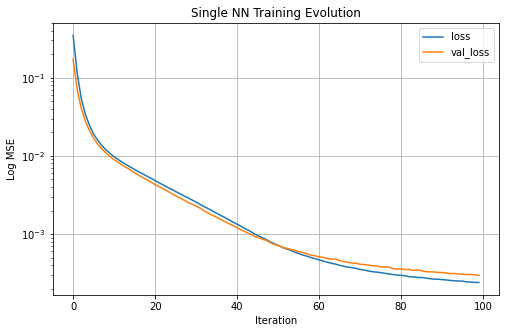

In [ ]:
# for this NN we will define it with 300 neurons
nodes20 = 300
# initialize the mode as Sequential class - the next steps we will add layers to it 
model20 = Sequential()

# to add a layer we call the add method from model (Sequential) and pass as argument the Dense class
# https://keras.io/api/layers/core_layers/dense/
model20.add(Dense(nodes20, activation='relu', input_dim=X2_scaled_train.shape[1])) # activation = 'relu', 'tanh', 'sigmoid'

# since we want to predict a single value we add one additional layer with one neuron 
model20.add(Dense(1))
# we will use our customized activation function
model20.add(Activation(custom_activation))


# https://keras.io/api/models/model_training_apis/

# compile the model
model20.compile(loss='mse', optimizer='adam') # optimizer = 'rmsprop', 'sgd', 'adam'

# fit the model
history = model20.fit(X2_scaled_train, y2_train, batch_size=64, epochs=100, validation_split=0.2, verbose=2,
                          validation_data=(X2_scaled_val, y2_val))
print()
# print the model parameters
print(model20.summary())

# plot the model learning history
pd.DataFrame(history.history).plot(figsize=(8,5), logy=True)
plt.title('Single NN Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

Deep Neural Network

Epoch 1/100
2/2 - 1s - loss: 0.6140 - val_loss: 0.4260 - 509ms/epoch - 254ms/step
Epoch 2/100
2/2 - 0s - loss: 0.3892 - val_loss: 0.2694 - 27ms/epoch - 13ms/step
Epoch 3/100
2/2 - 0s - loss: 0.2430 - val_loss: 0.1666 - 30ms/epoch - 15ms/step
Epoch 4/100
2/2 - 0s - loss: 0.1500 - val_loss: 0.1017 - 27ms/epoch - 14ms/step
Epoch 5/100
2/2 - 0s - loss: 0.0921 - val_loss: 0.0635 - 28ms/epoch - 14ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0584 - val_loss: 0.0432 - 29ms/epoch - 15ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0421 - val_loss: 0.0336 - 28ms/epoch - 14ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0345 - val_loss: 0.0299 - 37ms/epoch - 18ms/step
Epoch 9/100
2/2 - 0s - loss: 0.0323 - val_loss: 0.0288 - 30ms/epoch - 15ms/step
Epoch 10/100
2/2 - 0s - loss: 0.0318 - val_loss: 0.0284 - 34ms/epoch - 17ms/step
Epoch 11/100
2/2 - 0s - loss: 0.0316 - val_loss: 0.0280 - 35ms/epoch - 18ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0313 - val_loss: 0.0272 - 31ms/epoch - 16ms/step
Epoch 13/100
2/2 - 0s - loss: 0.030

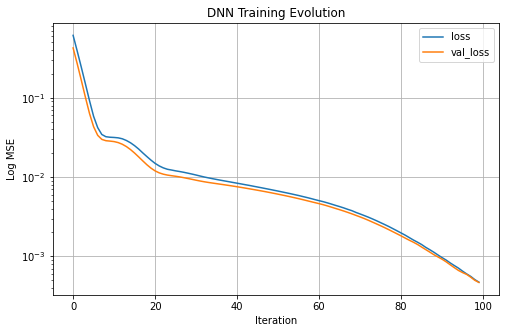

In [ ]:
# for the DNN we will continue to use 300 neurons - but instead of a single layer of 300 neurons, we will use 3 layers of 100 neurons each

# number of neurons per layer
nodes21 = 100

# initialize our new model as sequential class
model21 = Sequential()

# add the first layer of 100 neurons - for the first layer you must declare the number of features through input_dim arguments
model21.add(Dense(nodes21, activation='relu', input_dim=X2_scaled_train.shape[1])) # activation = 'relu', 'tanh', 'sigmoid'

# add second layer of 100 neurons - no need to declare the input dimensions, keras does that automatically
model21.add(Dense(nodes21, activation='relu'))

# add third layer of 100 neurons 
model21.add(Dense(nodes21, activation='relu'))

# output layer is the same as the single NN
model21.add(Dense(1))
model21.add(Activation(custom_activation))


# compile and fit the model
model21.compile(loss='mse', optimizer='adam') # optimizer = 'rmsprop', 'sgd', 'adam'
history = model21.fit(X2_scaled_train, y2_train, batch_size=512, epochs=100, validation_split=0.2, verbose=2,
                          validation_data=(X2_scaled_val, y2_val))
print()
print(model21.summary())


pd.DataFrame(history.history).plot(figsize=(8,5), logy=True)
plt.title('DNN Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

Epoch 1/100
2/2 - 1s - loss: 0.5324 - val_loss: 0.4607 - 656ms/epoch - 328ms/step
Epoch 2/100
2/2 - 0s - loss: 0.4362 - val_loss: 0.3654 - 30ms/epoch - 15ms/step
Epoch 3/100
2/2 - 0s - loss: 0.3415 - val_loss: 0.2741 - 29ms/epoch - 15ms/step
Epoch 4/100
2/2 - 0s - loss: 0.2522 - val_loss: 0.1954 - 26ms/epoch - 13ms/step
Epoch 5/100
2/2 - 0s - loss: 0.1774 - val_loss: 0.1337 - 29ms/epoch - 14ms/step
Epoch 6/100
2/2 - 0s - loss: 0.1199 - val_loss: 0.0906 - 30ms/epoch - 15ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0826 - val_loss: 0.0642 - 27ms/epoch - 14ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0605 - val_loss: 0.0508 - 32ms/epoch - 16ms/step
Epoch 9/100
2/2 - 0s - loss: 0.0509 - val_loss: 0.0454 - 31ms/epoch - 16ms/step
Epoch 10/100
2/2 - 0s - loss: 0.0476 - val_loss: 0.0439 - 30ms/epoch - 15ms/step
Epoch 11/100
2/2 - 0s - loss: 0.0471 - val_loss: 0.0435 - 32ms/epoch - 16ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0471 - val_loss: 0.0428 - 32ms/epoch - 16ms/step
Epoch 13/100
2/2 - 0s - loss: 0.046

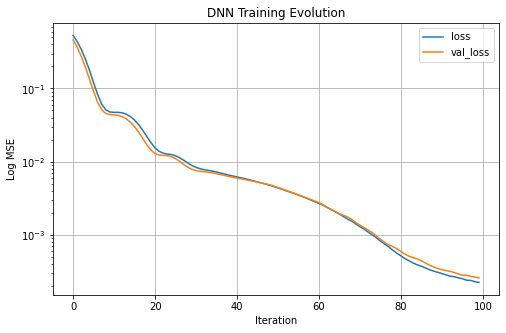

In [ ]:
# for the DNN we will continue to use 300 neurons - we will use 6 layers of 50 neurons each

# number of neurons per layer
nodes22 = 50

# initialize our new model as sequential class
model22 = Sequential()

# add the first layer of 100 neurons - for the first layer you must declare the number of features through input_dim arguments
model22.add(Dense(nodes22, activation='relu', input_dim=X2_scaled_train.shape[1])) # activation = 'relu', 'tanh', 'sigmoid'

for i in range(5):
  model22.add(Dense(nodes22, activation='relu'))


# output layer is the same as the single NN
model22.add(Dense(1))
model22.add(Activation(custom_activation))


# compile and fit the model
model22.compile(loss='mse', optimizer='adam') # optimizer = 'rmsprop', 'sgd', 'adam'
history = model22.fit(X2_scaled_train, y2_train, batch_size=512, epochs=100, validation_split=0.2, verbose=2,
                          validation_data=(X2_scaled_val, y2_val))
print()
print(model22.summary())


pd.DataFrame(history.history).plot(figsize=(8,5), logy=True)
plt.title('DNN Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

Epoch 1/100
12/12 - 0s - loss: 0.3203 - val_loss: 0.1245 - 449ms/epoch - 37ms/step
Epoch 2/100
12/12 - 0s - loss: 0.0770 - val_loss: 0.0450 - 43ms/epoch - 4ms/step
Epoch 3/100
12/12 - 0s - loss: 0.0347 - val_loss: 0.0258 - 44ms/epoch - 4ms/step
Epoch 4/100
12/12 - 0s - loss: 0.0216 - val_loss: 0.0172 - 69ms/epoch - 6ms/step
Epoch 5/100
12/12 - 0s - loss: 0.0150 - val_loss: 0.0124 - 49ms/epoch - 4ms/step
Epoch 6/100
12/12 - 0s - loss: 0.0116 - val_loss: 0.0102 - 44ms/epoch - 4ms/step
Epoch 7/100
12/12 - 0s - loss: 0.0100 - val_loss: 0.0087 - 41ms/epoch - 3ms/step
Epoch 8/100
12/12 - 0s - loss: 0.0088 - val_loss: 0.0078 - 42ms/epoch - 3ms/step
Epoch 9/100
12/12 - 0s - loss: 0.0079 - val_loss: 0.0070 - 45ms/epoch - 4ms/step
Epoch 10/100
12/12 - 0s - loss: 0.0072 - val_loss: 0.0064 - 60ms/epoch - 5ms/step
Epoch 11/100
12/12 - 0s - loss: 0.0066 - val_loss: 0.0058 - 51ms/epoch - 4ms/step
Epoch 12/100
12/12 - 0s - loss: 0.0061 - val_loss: 0.0054 - 63ms/epoch - 5ms/step
Epoch 13/100
12/12 - 0s

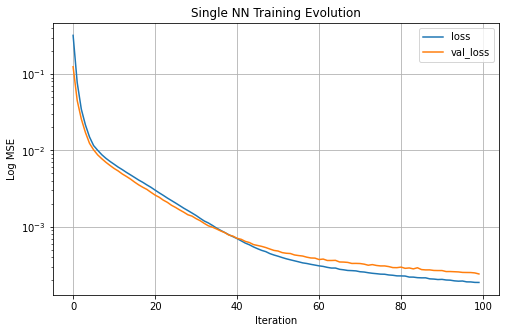

In [ ]:
# for this NN we will define it with 600 neurons
nodes23 = 600

model23 = Sequential()
model23.add(Dense(nodes23, activation='relu', input_dim=X2_scaled_train.shape[1])) 

# add one additional layer with one neuron 
model23.add(Dense(1))
# we will use our customized activation function
model23.add(Activation(custom_activation))

# compile the model
model23.compile(loss='mse', optimizer='adam') 

# fit the model
history = model23.fit(X2_scaled_train, y2_train, batch_size=64, epochs=100, validation_split=0.2, verbose=2,
                          validation_data=(X2_scaled_val, y2_val))
print()
# print the model parameters
print(model23.summary())

# plot the model learning history
pd.DataFrame(history.history).plot(figsize=(8,5), logy=True)
plt.title('Single NN Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

Epoch 1/100
2/2 - 1s - loss: 0.5500 - val_loss: 0.4250 - 656ms/epoch - 328ms/step
Epoch 2/100
2/2 - 0s - loss: 0.3903 - val_loss: 0.2794 - 35ms/epoch - 18ms/step
Epoch 3/100
2/2 - 0s - loss: 0.2492 - val_loss: 0.1571 - 45ms/epoch - 23ms/step
Epoch 4/100
2/2 - 0s - loss: 0.1380 - val_loss: 0.0817 - 36ms/epoch - 18ms/step
Epoch 5/100
2/2 - 0s - loss: 0.0753 - val_loss: 0.0538 - 41ms/epoch - 21ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0553 - val_loss: 0.0521 - 34ms/epoch - 17ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0576 - val_loss: 0.0563 - 34ms/epoch - 17ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0621 - val_loss: 0.0582 - 32ms/epoch - 16ms/step
Epoch 9/100
2/2 - 0s - loss: 0.0636 - val_loss: 0.0566 - 40ms/epoch - 20ms/step
Epoch 10/100
2/2 - 0s - loss: 0.0612 - val_loss: 0.0513 - 32ms/epoch - 16ms/step
Epoch 11/100
2/2 - 0s - loss: 0.0546 - val_loss: 0.0426 - 36ms/epoch - 18ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0449 - val_loss: 0.0318 - 37ms/epoch - 18ms/step
Epoch 13/100
2/2 - 0s - loss: 0.033

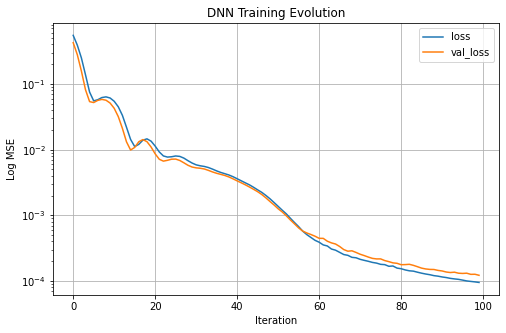

In [ ]:
# for the DNN we will continue to use 600 neurons - but instead of a single layer of 600 neurons, we will use 6 layers of 100 neurons each

# number of neurons per layer
nodes24 = 100
model24 = Sequential()

model24.add(Dense(nodes24, activation='relu', input_dim=X2_scaled_train.shape[1]))

for i in range(5):
  model24.add(Dense(nodes24, activation='relu'))

# output layer is the same as the single NN
model24.add(Dense(1))
model24.add(Activation(custom_activation))

# compile and fit the model
model24.compile(loss='mse', optimizer='adam') # optimizer = 'rmsprop', 'sgd', 'adam'
history = model24.fit(X2_scaled_train, y2_train, batch_size=512, epochs=100, validation_split=0.2, verbose=2,
                          validation_data=(X2_scaled_val, y2_val))
print()
print(model24.summary())


pd.DataFrame(history.history).plot(figsize=(8,5), logy=True)
plt.title('DNN Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

New NN with different activation functions


Epoch 1/100
12/12 - 0s - loss: 0.0533 - val_loss: 0.0368 - 446ms/epoch - 37ms/step
Epoch 2/100
12/12 - 0s - loss: 0.0376 - val_loss: 0.0287 - 37ms/epoch - 3ms/step
Epoch 3/100
12/12 - 0s - loss: 0.0241 - val_loss: 0.0213 - 39ms/epoch - 3ms/step
Epoch 4/100
12/12 - 0s - loss: 0.0181 - val_loss: 0.0144 - 46ms/epoch - 4ms/step
Epoch 5/100
12/12 - 0s - loss: 0.0125 - val_loss: 0.0101 - 45ms/epoch - 4ms/step
Epoch 6/100
12/12 - 0s - loss: 0.0088 - val_loss: 0.0072 - 43ms/epoch - 4ms/step
Epoch 7/100
12/12 - 0s - loss: 0.0063 - val_loss: 0.0052 - 41ms/epoch - 3ms/step
Epoch 8/100
12/12 - 0s - loss: 0.0048 - val_loss: 0.0041 - 61ms/epoch - 5ms/step
Epoch 9/100
12/12 - 0s - loss: 0.0039 - val_loss: 0.0034 - 43ms/epoch - 4ms/step
Epoch 10/100
12/12 - 0s - loss: 0.0034 - val_loss: 0.0030 - 43ms/epoch - 4ms/step
Epoch 11/100
12/12 - 0s - loss: 0.0031 - val_loss: 0.0028 - 68ms/epoch - 6ms/step
Epoch 12/100
12/12 - 0s - loss: 0.0029 - val_loss: 0.0026 - 45ms/epoch - 4ms/step
Epoch 13/100
12/12 - 0s

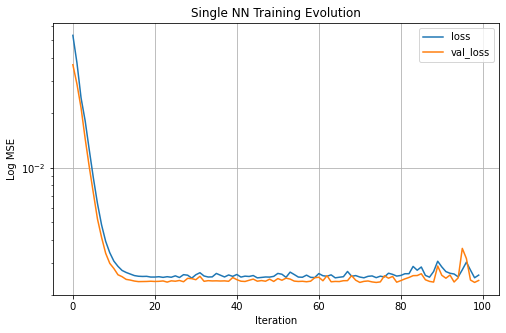

In [ ]:
# SNN with 300 neurons and sigmoid activation
nodes26 = 300
model26 = Sequential()


model26.add(Dense(nodes26, activation='sigmoid', input_dim=X2_scaled_train.shape[1]))

model26.add(Dense(1))
model26.add(Activation(custom_activation))

model26.compile(loss='mse', optimizer='adam') 

# fit the model
history = model26.fit(X2_scaled_train, y2_train, batch_size=64, epochs=100, validation_split=0.2, verbose=2,
                          validation_data=(X2_scaled_val, y2_val))
print()
# print the model parameters
print(model26.summary())

# plot the model learning history
pd.DataFrame(history.history).plot(figsize=(8,5), logy=True)
plt.title('Single NN Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

Epoch 1/100
2/2 - 1s - loss: 0.9522 - val_loss: 0.3791 - 529ms/epoch - 265ms/step
Epoch 2/100
2/2 - 0s - loss: 0.3252 - val_loss: 0.1415 - 33ms/epoch - 17ms/step
Epoch 3/100
2/2 - 0s - loss: 0.1228 - val_loss: 0.0663 - 30ms/epoch - 15ms/step
Epoch 4/100
2/2 - 0s - loss: 0.0607 - val_loss: 0.0435 - 29ms/epoch - 14ms/step
Epoch 5/100
2/2 - 0s - loss: 0.0434 - val_loss: 0.0382 - 30ms/epoch - 15ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0400 - val_loss: 0.0386 - 37ms/epoch - 19ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0419 - val_loss: 0.0406 - 32ms/epoch - 16ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0446 - val_loss: 0.0430 - 27ms/epoch - 14ms/step
Epoch 9/100
2/2 - 0s - loss: 0.0475 - val_loss: 0.0450 - 33ms/epoch - 16ms/step
Epoch 10/100
2/2 - 0s - loss: 0.0498 - val_loss: 0.0467 - 28ms/epoch - 14ms/step
Epoch 11/100
2/2 - 0s - loss: 0.0517 - val_loss: 0.0481 - 32ms/epoch - 16ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0530 - val_loss: 0.0490 - 26ms/epoch - 13ms/step
Epoch 13/100
2/2 - 0s - loss: 0.054

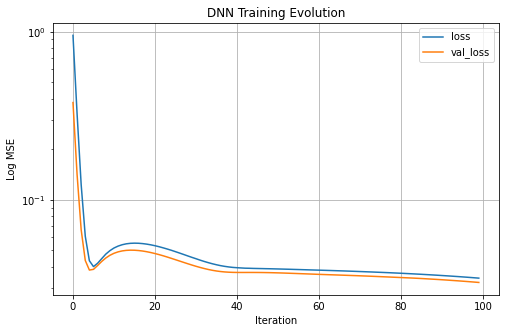

In [ ]:
# DNN with 3 layers of 100 neurons, using Sigmoid activation function
nodes27 = 100
model27 = Sequential()

model27.add(Dense(nodes27, activation='sigmoid', input_dim=X2_scaled_train.shape[1])) 

model27.add(Dense(nodes27, activation='sigmoid'))
model27.add(Dense(nodes27, activation='sigmoid'))

# output layer is the same as the single NN
model27.add(Dense(1))
model27.add(Activation(custom_activation))


# compile and fit the model
model27.compile(loss='mse', optimizer='adam') # optimizer = 'rmsprop', 'sgd', 'adam'
history = model27.fit(X2_scaled_train, y2_train, batch_size=512, epochs=100, validation_split=0.2, verbose=2,
                          validation_data=(X2_scaled_val, y2_val))
print()
print(model27.summary())


pd.DataFrame(history.history).plot(figsize=(8,5), logy=True)
plt.title('DNN Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

Epoch 1/100
2/2 - 1s - loss: 1.3344 - val_loss: 0.2524 - 1s/epoch - 524ms/step
Epoch 2/100
2/2 - 0s - loss: 0.2062 - val_loss: 0.0639 - 34ms/epoch - 17ms/step
Epoch 3/100
2/2 - 0s - loss: 0.0574 - val_loss: 0.0387 - 26ms/epoch - 13ms/step
Epoch 4/100
2/2 - 0s - loss: 0.0407 - val_loss: 0.0404 - 32ms/epoch - 16ms/step
Epoch 5/100
2/2 - 0s - loss: 0.0447 - val_loss: 0.0453 - 27ms/epoch - 13ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0502 - val_loss: 0.0498 - 29ms/epoch - 14ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0553 - val_loss: 0.0535 - 29ms/epoch - 15ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0592 - val_loss: 0.0563 - 33ms/epoch - 16ms/step
Epoch 9/100
2/2 - 0s - loss: 0.0623 - val_loss: 0.0584 - 33ms/epoch - 16ms/step
Epoch 10/100
2/2 - 0s - loss: 0.0645 - val_loss: 0.0599 - 30ms/epoch - 15ms/step
Epoch 11/100
2/2 - 0s - loss: 0.0660 - val_loss: 0.0610 - 34ms/epoch - 17ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0671 - val_loss: 0.0616 - 28ms/epoch - 14ms/step
Epoch 13/100
2/2 - 0s - loss: 0.0677 -

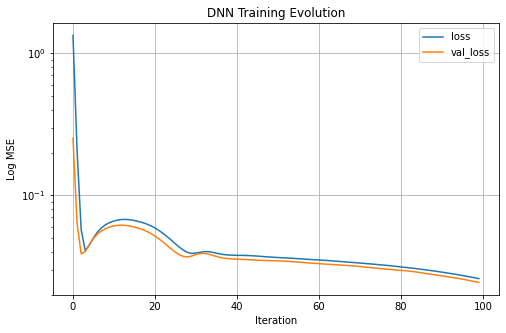

In [ ]:
# DNN with 3 layers of 100 neurons, using  activation function: sigmoid, sigmoid, relu
nodes27_2 = 100
model27_2 = Sequential()

model27_2.add(Dense(nodes27_2, activation='sigmoid', input_dim=X2_scaled_train.shape[1])) 

model27_2.add(Dense(nodes27_2, activation='sigmoid'))
model27_2.add(Dense(nodes27_2, activation='relu'))

# output layer is the same as the single NN
model27_2.add(Dense(1))
model27_2.add(Activation(custom_activation))


# compile and fit the model
model27_2.compile(loss='mse', optimizer='adam') # optimizer = 'rmsprop', 'sgd', 'adam'
history = model27_2.fit(X2_scaled_train, y2_train, batch_size=512, epochs=100, validation_split=0.2, verbose=2,
                          validation_data=(X2_scaled_val, y2_val))
print()
print(model27_2.summary())


pd.DataFrame(history.history).plot(figsize=(8,5), logy=True)
plt.title('DNN Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

Epoch 1/100
2/2 - 1s - loss: 0.6761 - val_loss: 0.1446 - 535ms/epoch - 267ms/step
Epoch 2/100
2/2 - 0s - loss: 0.1212 - val_loss: 0.0514 - 30ms/epoch - 15ms/step
Epoch 3/100
2/2 - 0s - loss: 0.0486 - val_loss: 0.0381 - 32ms/epoch - 16ms/step
Epoch 4/100
2/2 - 0s - loss: 0.0406 - val_loss: 0.0398 - 31ms/epoch - 16ms/step
Epoch 5/100
2/2 - 0s - loss: 0.0442 - val_loss: 0.0434 - 30ms/epoch - 15ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0481 - val_loss: 0.0458 - 30ms/epoch - 15ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0508 - val_loss: 0.0469 - 36ms/epoch - 18ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0519 - val_loss: 0.0469 - 31ms/epoch - 15ms/step
Epoch 9/100
2/2 - 0s - loss: 0.0518 - val_loss: 0.0460 - 35ms/epoch - 18ms/step
Epoch 10/100
2/2 - 0s - loss: 0.0505 - val_loss: 0.0442 - 32ms/epoch - 16ms/step
Epoch 11/100
2/2 - 0s - loss: 0.0484 - val_loss: 0.0419 - 32ms/epoch - 16ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0458 - val_loss: 0.0393 - 31ms/epoch - 16ms/step
Epoch 13/100
2/2 - 0s - loss: 0.042

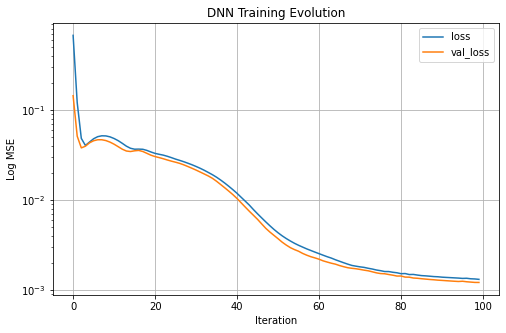

In [ ]:
# DNN with 3 layers of 100 neurons, using  activation function: sigmoid, relu, relu
nodes27_3 = 100
model27_3 = Sequential()

model27_3.add(Dense(nodes27_3, activation='sigmoid', input_dim=X2_scaled_train.shape[1])) 

model27_3.add(Dense(nodes27_3, activation='relu'))
model27_3.add(Dense(nodes27_3, activation='relu'))

# output layer is the same as the single NN
model27_3.add(Dense(1))
model27_3.add(Activation(custom_activation))


# compile and fit the model
model27_3.compile(loss='mse', optimizer='adam') # optimizer = 'rmsprop', 'sgd', 'adam'
history = model27_3.fit(X2_scaled_train, y2_train, batch_size=512, epochs=100, validation_split=0.2, verbose=2,
                          validation_data=(X2_scaled_val, y2_val))
print()
print(model27_3.summary())


pd.DataFrame(history.history).plot(figsize=(8,5), logy=True)
plt.title('DNN Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

Epoch 1/100
2/2 - 1s - loss: 0.0432 - val_loss: 0.0355 - 517ms/epoch - 259ms/step
Epoch 2/100
2/2 - 0s - loss: 0.0362 - val_loss: 0.0309 - 28ms/epoch - 14ms/step
Epoch 3/100
2/2 - 0s - loss: 0.0322 - val_loss: 0.0278 - 30ms/epoch - 15ms/step
Epoch 4/100
2/2 - 0s - loss: 0.0292 - val_loss: 0.0245 - 29ms/epoch - 15ms/step
Epoch 5/100
2/2 - 0s - loss: 0.0256 - val_loss: 0.0206 - 26ms/epoch - 13ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0214 - val_loss: 0.0162 - 26ms/epoch - 13ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0164 - val_loss: 0.0120 - 26ms/epoch - 13ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0119 - val_loss: 0.0088 - 36ms/epoch - 18ms/step
Epoch 9/100
2/2 - 0s - loss: 0.0085 - val_loss: 0.0070 - 35ms/epoch - 17ms/step
Epoch 10/100
2/2 - 0s - loss: 0.0067 - val_loss: 0.0054 - 28ms/epoch - 14ms/step
Epoch 11/100
2/2 - 0s - loss: 0.0051 - val_loss: 0.0034 - 32ms/epoch - 16ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0034 - val_loss: 0.0024 - 30ms/epoch - 15ms/step
Epoch 13/100
2/2 - 0s - loss: 0.002

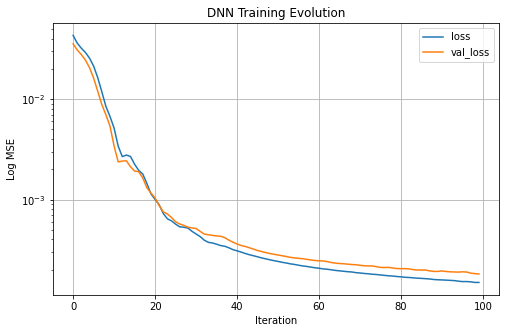

In [ ]:
# DNN with 3 layers of 100 neurons, using  activation function: relu, relu, sigmoid
nodes27_4 = 100
model27_4 = Sequential()

model27_4.add(Dense(nodes27_4, activation='relu', input_dim=X2_scaled_train.shape[1])) 

model27_4.add(Dense(nodes27_4, activation='relu'))
model27_4.add(Dense(nodes27_4, activation='sigmoid'))

# output layer is the same as the single NN
model27_4.add(Dense(1))
model27_4.add(Activation(custom_activation))


# compile and fit the model
model27_4.compile(loss='mse', optimizer='adam') # optimizer = 'rmsprop', 'sgd', 'adam'
history = model27_4.fit(X2_scaled_train, y2_train, batch_size=512, epochs=100, validation_split=0.2, verbose=2,
                          validation_data=(X2_scaled_val, y2_val))
print()
print(model27_4.summary())


pd.DataFrame(history.history).plot(figsize=(8,5), logy=True)
plt.title('DNN Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

Epoch 1/100
12/12 - 0s - loss: 0.4642 - val_loss: 0.3011 - 460ms/epoch - 38ms/step
Epoch 2/100
12/12 - 0s - loss: 0.2190 - val_loss: 0.1453 - 39ms/epoch - 3ms/step
Epoch 3/100
12/12 - 0s - loss: 0.1069 - val_loss: 0.0734 - 39ms/epoch - 3ms/step
Epoch 4/100
12/12 - 0s - loss: 0.0545 - val_loss: 0.0389 - 40ms/epoch - 3ms/step
Epoch 5/100
12/12 - 0s - loss: 0.0298 - val_loss: 0.0225 - 39ms/epoch - 3ms/step
Epoch 6/100
12/12 - 0s - loss: 0.0178 - val_loss: 0.0141 - 43ms/epoch - 4ms/step
Epoch 7/100
12/12 - 0s - loss: 0.0116 - val_loss: 0.0096 - 42ms/epoch - 3ms/step
Epoch 8/100
12/12 - 0s - loss: 0.0081 - val_loss: 0.0070 - 43ms/epoch - 4ms/step
Epoch 9/100
12/12 - 0s - loss: 0.0061 - val_loss: 0.0054 - 42ms/epoch - 4ms/step
Epoch 10/100
12/12 - 0s - loss: 0.0048 - val_loss: 0.0044 - 42ms/epoch - 3ms/step
Epoch 11/100
12/12 - 0s - loss: 0.0041 - val_loss: 0.0037 - 43ms/epoch - 4ms/step
Epoch 12/100
12/12 - 0s - loss: 0.0036 - val_loss: 0.0033 - 43ms/epoch - 4ms/step
Epoch 13/100
12/12 - 0s

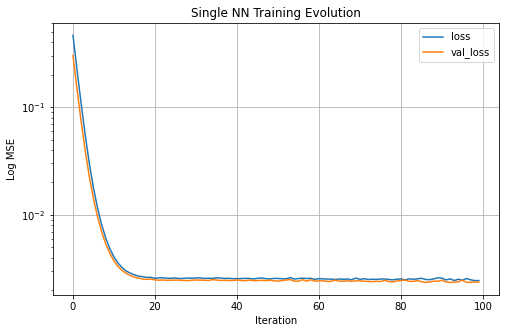

In [ ]:
# SNN with 300 neurons and tanh activation
nodes28 = 300
model28 = Sequential()


model28.add(Dense(nodes28, activation='tanh', input_dim=X2_scaled_train.shape[1]))

model28.add(Dense(1))
model28.add(Activation(custom_activation))

model28.compile(loss='mse', optimizer='adam') 

# fit the model
history = model28.fit(X2_scaled_train, y2_train, batch_size=64, epochs=100, validation_split=0.2, verbose=2,
                          validation_data=(X2_scaled_val, y2_val))
print()
# print the model parameters
print(model28.summary())

# plot the model learning history
pd.DataFrame(history.history).plot(figsize=(8,5), logy=True)
plt.title('Single NN Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

Epoch 1/100
2/2 - 1s - loss: 0.6689 - val_loss: 0.5238 - 512ms/epoch - 256ms/step
Epoch 2/100
2/2 - 0s - loss: 0.5130 - val_loss: 0.4977 - 28ms/epoch - 14ms/step
Epoch 3/100
2/2 - 0s - loss: 0.4710 - val_loss: 0.3830 - 29ms/epoch - 15ms/step
Epoch 4/100
2/2 - 0s - loss: 0.3592 - val_loss: 0.3069 - 28ms/epoch - 14ms/step
Epoch 5/100
2/2 - 0s - loss: 0.2946 - val_loss: 0.2670 - 29ms/epoch - 14ms/step
Epoch 6/100
2/2 - 0s - loss: 0.2539 - val_loss: 0.2244 - 29ms/epoch - 15ms/step
Epoch 7/100
2/2 - 0s - loss: 0.2089 - val_loss: 0.1726 - 47ms/epoch - 23ms/step
Epoch 8/100
2/2 - 0s - loss: 0.1587 - val_loss: 0.1249 - 26ms/epoch - 13ms/step
Epoch 9/100
2/2 - 0s - loss: 0.1156 - val_loss: 0.0902 - 30ms/epoch - 15ms/step
Epoch 10/100
2/2 - 0s - loss: 0.0837 - val_loss: 0.0661 - 32ms/epoch - 16ms/step
Epoch 11/100
2/2 - 0s - loss: 0.0612 - val_loss: 0.0477 - 37ms/epoch - 19ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0436 - val_loss: 0.0326 - 32ms/epoch - 16ms/step
Epoch 13/100
2/2 - 0s - loss: 0.029

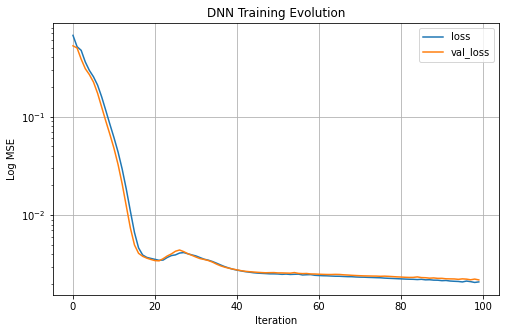

In [ ]:
# DNN with 3 layers of 100 neurons, using tanh activation function
nodes29 = 100
model29 = Sequential()

model29.add(Dense(nodes29, activation='tanh', input_dim=X2_scaled_train.shape[1])) 

model29.add(Dense(nodes29, activation='tanh'))
model29.add(Dense(nodes29, activation='tanh'))

# output layer is the same as the single NN
model29.add(Dense(1))
model29.add(Activation(custom_activation))


# compile and fit the model
model29.compile(loss='mse', optimizer='adam') # optimizer = 'rmsprop', 'sgd', 'adam'
history = model29.fit(X2_scaled_train, y2_train, batch_size=512, epochs=100, validation_split=0.2, verbose=2,
                          validation_data=(X2_scaled_val, y2_val))
print()
print(model29.summary())


pd.DataFrame(history.history).plot(figsize=(8,5), logy=True)
plt.title('DNN Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

Models with different parameters

Epoch 1/100
12/12 - 1s - loss: 0.2898 - val_loss: 0.1407 - 529ms/epoch - 44ms/step
Epoch 2/100
12/12 - 0s - loss: 0.0996 - val_loss: 0.0673 - 43ms/epoch - 4ms/step
Epoch 3/100
12/12 - 0s - loss: 0.0504 - val_loss: 0.0363 - 51ms/epoch - 4ms/step
Epoch 4/100
12/12 - 0s - loss: 0.0279 - val_loss: 0.0204 - 44ms/epoch - 4ms/step
Epoch 5/100
12/12 - 0s - loss: 0.0165 - val_loss: 0.0121 - 56ms/epoch - 5ms/step
Epoch 6/100
12/12 - 0s - loss: 0.0105 - val_loss: 0.0079 - 43ms/epoch - 4ms/step
Epoch 7/100
12/12 - 0s - loss: 0.0073 - val_loss: 0.0057 - 39ms/epoch - 3ms/step
Epoch 8/100
12/12 - 0s - loss: 0.0052 - val_loss: 0.0037 - 41ms/epoch - 3ms/step
Epoch 9/100
12/12 - 0s - loss: 0.0036 - val_loss: 0.0026 - 42ms/epoch - 4ms/step
Epoch 10/100
12/12 - 0s - loss: 0.0024 - val_loss: 0.0017 - 44ms/epoch - 4ms/step
Epoch 11/100
12/12 - 0s - loss: 0.0016 - val_loss: 0.0015 - 45ms/epoch - 4ms/step
Epoch 12/100
12/12 - 0s - loss: 0.0011 - val_loss: 9.8806e-04 - 43ms/epoch - 4ms/step
Epoch 13/100
12/12 

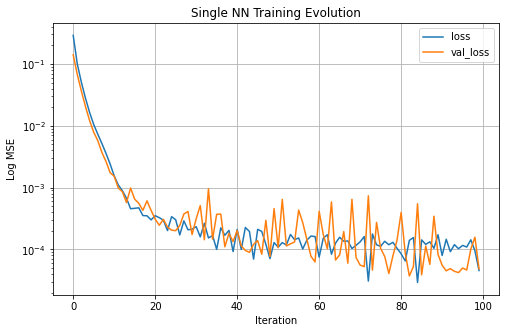

In [ ]:
# SNN with 300 neurons and relu activation and rmsprop optimizer
nodes30 = 300
model30 = Sequential()


model30.add(Dense(nodes30, activation='relu', input_dim=X2_scaled_train.shape[1]))

model30.add(Dense(1))
model30.add(Activation(custom_activation))

model30.compile(loss='mse', optimizer='rmsprop') 

# fit the model
history = model30.fit(X2_scaled_train, y2_train, batch_size=64, epochs=100, validation_split=0.2, verbose=2,
                          validation_data=(X2_scaled_val, y2_val))
print()
# print the model parameters
print(model30.summary())

# plot the model learning history
pd.DataFrame(history.history).plot(figsize=(8,5), logy=True)
plt.title('Single NN Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

Epoch 1/100
2/2 - 1s - loss: 0.5153 - val_loss: 0.2294 - 708ms/epoch - 354ms/step
Epoch 2/100
2/2 - 0s - loss: 0.2046 - val_loss: 0.1297 - 29ms/epoch - 14ms/step
Epoch 3/100
2/2 - 0s - loss: 0.1185 - val_loss: 0.0804 - 32ms/epoch - 16ms/step
Epoch 4/100
2/2 - 0s - loss: 0.0754 - val_loss: 0.0551 - 29ms/epoch - 14ms/step
Epoch 5/100
2/2 - 0s - loss: 0.0531 - val_loss: 0.0414 - 27ms/epoch - 14ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0405 - val_loss: 0.0324 - 27ms/epoch - 13ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0322 - val_loss: 0.0265 - 28ms/epoch - 14ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0264 - val_loss: 0.0219 - 32ms/epoch - 16ms/step
Epoch 9/100
2/2 - 0s - loss: 0.0219 - val_loss: 0.0185 - 30ms/epoch - 15ms/step
Epoch 10/100
2/2 - 0s - loss: 0.0187 - val_loss: 0.0161 - 30ms/epoch - 15ms/step
Epoch 11/100
2/2 - 0s - loss: 0.0164 - val_loss: 0.0141 - 30ms/epoch - 15ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0145 - val_loss: 0.0125 - 34ms/epoch - 17ms/step
Epoch 13/100
2/2 - 0s - loss: 0.013

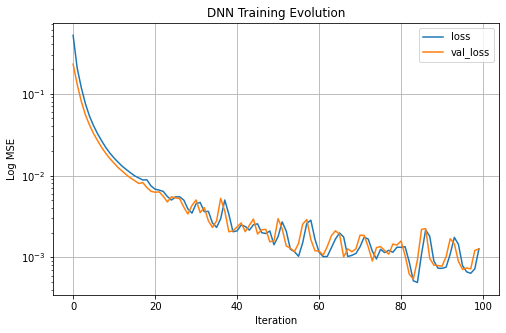

In [ ]:
# DNN with 3 layers of 100 neurons, using relu activation function and rmsprop optimizer
nodes31 = 100
model31 = Sequential()

model31.add(Dense(nodes31, activation='relu', input_dim=X2_scaled_train.shape[1])) 

model31.add(Dense(nodes31, activation='relu'))
model31.add(Dense(nodes31, activation='relu'))

# output layer is the same as the single NN
model31.add(Dense(1))
model31.add(Activation(custom_activation))


# compile and fit the model
model31.compile(loss='mse', optimizer='rmsprop') # optimizer = 'rmsprop', 'sgd', 'adam'
history = model31.fit(X2_scaled_train, y2_train, batch_size=512, epochs=100, validation_split=0.2, verbose=2,
                          validation_data=(X2_scaled_val, y2_val))
print()
print(model31.summary())


pd.DataFrame(history.history).plot(figsize=(8,5), logy=True)
plt.title('DNN Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

Epoch 1/100
12/12 - 0s - loss: 0.4045 - val_loss: 0.2570 - 382ms/epoch - 32ms/step
Epoch 2/100
12/12 - 0s - loss: 0.2004 - val_loss: 0.1588 - 33ms/epoch - 3ms/step
Epoch 3/100
12/12 - 0s - loss: 0.1322 - val_loss: 0.1140 - 36ms/epoch - 3ms/step
Epoch 4/100
12/12 - 0s - loss: 0.0982 - val_loss: 0.0891 - 52ms/epoch - 4ms/step
Epoch 5/100
12/12 - 0s - loss: 0.0784 - val_loss: 0.0730 - 41ms/epoch - 3ms/step
Epoch 6/100
12/12 - 0s - loss: 0.0653 - val_loss: 0.0617 - 36ms/epoch - 3ms/step
Epoch 7/100
12/12 - 0s - loss: 0.0559 - val_loss: 0.0537 - 50ms/epoch - 4ms/step
Epoch 8/100
12/12 - 0s - loss: 0.0491 - val_loss: 0.0476 - 40ms/epoch - 3ms/step
Epoch 9/100
12/12 - 0s - loss: 0.0439 - val_loss: 0.0429 - 38ms/epoch - 3ms/step
Epoch 10/100
12/12 - 0s - loss: 0.0399 - val_loss: 0.0391 - 41ms/epoch - 3ms/step
Epoch 11/100
12/12 - 0s - loss: 0.0365 - val_loss: 0.0360 - 37ms/epoch - 3ms/step
Epoch 12/100
12/12 - 0s - loss: 0.0338 - val_loss: 0.0333 - 44ms/epoch - 4ms/step
Epoch 13/100
12/12 - 0s

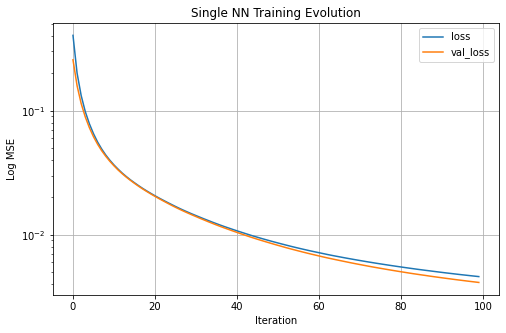

In [ ]:
# SNN with 300 neurons and relu activation and momentum (sgd) optimizer
nodes32 = 300
model32 = Sequential()


model32.add(Dense(nodes32, activation='relu', input_dim=X2_scaled_train.shape[1]))

model32.add(Dense(1))
model32.add(Activation(custom_activation))

model32.compile(loss='mse', optimizer='sgd') 

# fit the model
history = model32.fit(X2_scaled_train, y2_train, batch_size=64, epochs=100, validation_split=0.2, verbose=2,
                          validation_data=(X2_scaled_val, y2_val))
print()
# print the model parameters
print(model32.summary())

# plot the model learning history
pd.DataFrame(history.history).plot(figsize=(8,5), logy=True)
plt.title('Single NN Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

Epoch 1/100
2/2 - 0s - loss: 0.4958 - val_loss: 0.4214 - 473ms/epoch - 236ms/step
Epoch 2/100
2/2 - 0s - loss: 0.4045 - val_loss: 0.3547 - 29ms/epoch - 14ms/step
Epoch 3/100
2/2 - 0s - loss: 0.3406 - val_loss: 0.3054 - 27ms/epoch - 14ms/step
Epoch 4/100
2/2 - 0s - loss: 0.2933 - val_loss: 0.2677 - 27ms/epoch - 13ms/step
Epoch 5/100
2/2 - 0s - loss: 0.2569 - val_loss: 0.2377 - 27ms/epoch - 14ms/step
Epoch 6/100
2/2 - 0s - loss: 0.2279 - val_loss: 0.2129 - 27ms/epoch - 14ms/step
Epoch 7/100
2/2 - 0s - loss: 0.2041 - val_loss: 0.1927 - 26ms/epoch - 13ms/step
Epoch 8/100
2/2 - 0s - loss: 0.1845 - val_loss: 0.1756 - 28ms/epoch - 14ms/step
Epoch 9/100
2/2 - 0s - loss: 0.1681 - val_loss: 0.1613 - 25ms/epoch - 13ms/step
Epoch 10/100
2/2 - 0s - loss: 0.1542 - val_loss: 0.1489 - 35ms/epoch - 17ms/step
Epoch 11/100
2/2 - 0s - loss: 0.1423 - val_loss: 0.1382 - 42ms/epoch - 21ms/step
Epoch 12/100
2/2 - 0s - loss: 0.1319 - val_loss: 0.1287 - 28ms/epoch - 14ms/step
Epoch 13/100
2/2 - 0s - loss: 0.122

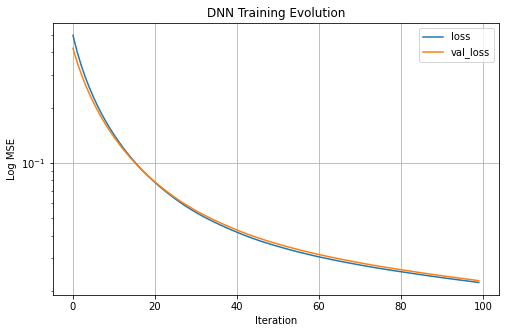

In [ ]:
# DNN with 3 layers of 100 neurons, using relu activation function and momentum (sgd) optimizer
nodes33 = 100
model33 = Sequential()

model33.add(Dense(nodes33, activation='relu', input_dim=X2_scaled_train.shape[1])) 

model33.add(Dense(nodes33, activation='relu'))
model33.add(Dense(nodes33, activation='relu'))

# output layer is the same as the single NN
model33.add(Dense(1))
model33.add(Activation(custom_activation))


# compile and fit the model
model33.compile(loss='mse', optimizer='sgd') # optimizer = 'rmsprop', 'sgd', 'adam'
history = model33.fit(X2_scaled_train, y2_train, batch_size=512, epochs=100, validation_split=0.2, verbose=2,
                          validation_data=(X2_scaled_val, y2_val))
print()
print(model33.summary())


pd.DataFrame(history.history).plot(figsize=(8,5), logy=True)
plt.title('DNN Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

Testing different Epochs

Epoch 1/500
12/12 - 0s - loss: 0.4264 - val_loss: 0.2132 - 450ms/epoch - 38ms/step
Epoch 2/500
12/12 - 0s - loss: 0.1416 - val_loss: 0.0868 - 53ms/epoch - 4ms/step
Epoch 3/500
12/12 - 0s - loss: 0.0659 - val_loss: 0.0480 - 39ms/epoch - 3ms/step
Epoch 4/500
12/12 - 0s - loss: 0.0400 - val_loss: 0.0322 - 46ms/epoch - 4ms/step
Epoch 5/500
12/12 - 0s - loss: 0.0284 - val_loss: 0.0236 - 39ms/epoch - 3ms/step
Epoch 6/500
12/12 - 0s - loss: 0.0215 - val_loss: 0.0184 - 44ms/epoch - 4ms/step
Epoch 7/500
12/12 - 0s - loss: 0.0174 - val_loss: 0.0150 - 42ms/epoch - 4ms/step
Epoch 8/500
12/12 - 0s - loss: 0.0145 - val_loss: 0.0126 - 37ms/epoch - 3ms/step
Epoch 9/500
12/12 - 0s - loss: 0.0125 - val_loss: 0.0109 - 45ms/epoch - 4ms/step
Epoch 10/500
12/12 - 0s - loss: 0.0110 - val_loss: 0.0096 - 44ms/epoch - 4ms/step
Epoch 11/500
12/12 - 0s - loss: 0.0099 - val_loss: 0.0086 - 45ms/epoch - 4ms/step
Epoch 12/500
12/12 - 0s - loss: 0.0090 - val_loss: 0.0078 - 67ms/epoch - 6ms/step
Epoch 13/500
12/12 - 0s

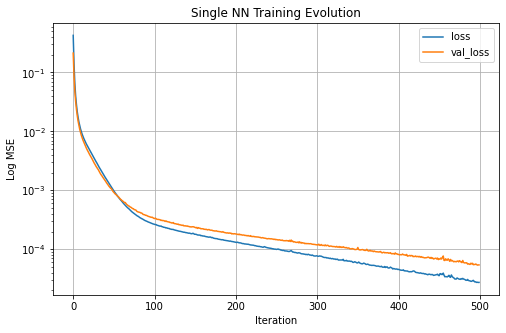

In [ ]:
# SNN with 300 neurons and relu activation and adam optimizer and 500 epochs
nodes34 = 300
model34 = Sequential()


model34.add(Dense(nodes34, activation='relu', input_dim=X2_scaled_train.shape[1]))

model34.add(Dense(1))
model34.add(Activation(custom_activation))

model34.compile(loss='mse', optimizer='adam') 

# fit the model
history = model34.fit(X2_scaled_train, y2_train, batch_size=64, epochs=500, validation_split=0.2, verbose=2,
                          validation_data=(X2_scaled_val, y2_val))
print()
# print the model parameters
print(model34.summary())

# plot the model learning history
pd.DataFrame(history.history).plot(figsize=(8,5), logy=True)
plt.title('Single NN Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

Epoch 1/500
2/2 - 1s - loss: 0.5602 - val_loss: 0.4497 - 668ms/epoch - 334ms/step
Epoch 2/500
2/2 - 0s - loss: 0.4178 - val_loss: 0.3165 - 34ms/epoch - 17ms/step
Epoch 3/500
2/2 - 0s - loss: 0.2870 - val_loss: 0.1883 - 37ms/epoch - 18ms/step
Epoch 4/500
2/2 - 0s - loss: 0.1676 - val_loss: 0.0987 - 43ms/epoch - 22ms/step
Epoch 5/500
2/2 - 0s - loss: 0.0901 - val_loss: 0.0601 - 35ms/epoch - 17ms/step
Epoch 6/500
2/2 - 0s - loss: 0.0598 - val_loss: 0.0550 - 32ms/epoch - 16ms/step
Epoch 7/500
2/2 - 0s - loss: 0.0599 - val_loss: 0.0596 - 34ms/epoch - 17ms/step
Epoch 8/500
2/2 - 0s - loss: 0.0653 - val_loss: 0.0632 - 46ms/epoch - 23ms/step
Epoch 9/500
2/2 - 0s - loss: 0.0686 - val_loss: 0.0635 - 38ms/epoch - 19ms/step
Epoch 10/500
2/2 - 0s - loss: 0.0682 - val_loss: 0.0604 - 37ms/epoch - 18ms/step
Epoch 11/500
2/2 - 0s - loss: 0.0640 - val_loss: 0.0544 - 36ms/epoch - 18ms/step
Epoch 12/500
2/2 - 0s - loss: 0.0567 - val_loss: 0.0456 - 36ms/epoch - 18ms/step
Epoch 13/500
2/2 - 0s - loss: 0.046

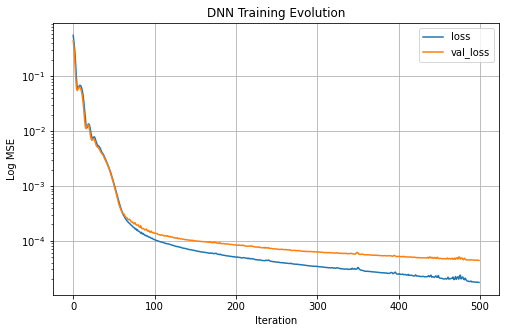

In [ ]:
#DNN with 3 layers, 100 neurons each, relu function, adam optimizer with 500 epochs
nodes35 = 100
model35 = Sequential()

model35.add(Dense(nodes35, activation='relu', input_dim=X2_scaled_train.shape[1]))

for i in range(5):
  model35.add(Dense(nodes35, activation='relu'))

# output layer is the same as the single NN
model35.add(Dense(1))
model35.add(Activation(custom_activation))

# compile and fit the model
model35.compile(loss='mse', optimizer='adam') # optimizer = 'rmsprop', 'sgd', 'adam'
history = model35.fit(X2_scaled_train, y2_train, batch_size=512, epochs=500, validation_split=0.2, verbose=2,
                          validation_data=(X2_scaled_val, y2_val))
print()
print(model35.summary())


pd.DataFrame(history.history).plot(figsize=(8,5), logy=True)
plt.title('DNN Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

Epoch 1/1000
12/12 - 0s - loss: 0.3637 - val_loss: 0.1874 - 477ms/epoch - 40ms/step
Epoch 2/1000
12/12 - 0s - loss: 0.1250 - val_loss: 0.0778 - 39ms/epoch - 3ms/step
Epoch 3/1000
12/12 - 0s - loss: 0.0594 - val_loss: 0.0437 - 60ms/epoch - 5ms/step
Epoch 4/1000
12/12 - 0s - loss: 0.0366 - val_loss: 0.0295 - 39ms/epoch - 3ms/step
Epoch 5/1000
12/12 - 0s - loss: 0.0260 - val_loss: 0.0214 - 45ms/epoch - 4ms/step
Epoch 6/1000
12/12 - 0s - loss: 0.0194 - val_loss: 0.0165 - 49ms/epoch - 4ms/step
Epoch 7/1000
12/12 - 0s - loss: 0.0156 - val_loss: 0.0134 - 45ms/epoch - 4ms/step
Epoch 8/1000
12/12 - 0s - loss: 0.0130 - val_loss: 0.0113 - 46ms/epoch - 4ms/step
Epoch 9/1000
12/12 - 0s - loss: 0.0112 - val_loss: 0.0098 - 49ms/epoch - 4ms/step
Epoch 10/1000
12/12 - 0s - loss: 0.0099 - val_loss: 0.0086 - 45ms/epoch - 4ms/step
Epoch 11/1000
12/12 - 0s - loss: 0.0089 - val_loss: 0.0078 - 45ms/epoch - 4ms/step
Epoch 12/1000
12/12 - 0s - loss: 0.0081 - val_loss: 0.0071 - 45ms/epoch - 4ms/step
Epoch 13/10

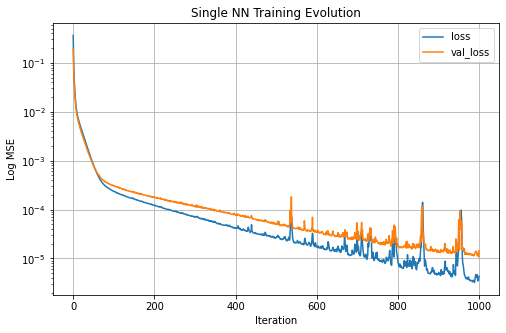

In [ ]:
# SNN with 300 neurons and relu activation and adam optimizer and 1000 epochs
nodes36 = 300
model36 = Sequential()


model36.add(Dense(nodes36, activation='relu', input_dim=X2_scaled_train.shape[1]))

model36.add(Dense(1))
model36.add(Activation(custom_activation))

model36.compile(loss='mse', optimizer='adam') 

# fit the model
history = model36.fit(X2_scaled_train, y2_train, batch_size=64, epochs=1000, validation_split=0.2, verbose=2,
                          validation_data=(X2_scaled_val, y2_val))
print()
# print the model parameters
print(model36.summary())

# plot the model learning history
pd.DataFrame(history.history).plot(figsize=(8,5), logy=True)
plt.title('Single NN Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

Epoch 1/1000
2/2 - 1s - loss: 0.4798 - val_loss: 0.3366 - 659ms/epoch - 330ms/step
Epoch 2/1000
2/2 - 0s - loss: 0.3021 - val_loss: 0.1850 - 33ms/epoch - 16ms/step
Epoch 3/1000
2/2 - 0s - loss: 0.1612 - val_loss: 0.0861 - 34ms/epoch - 17ms/step
Epoch 4/1000
2/2 - 0s - loss: 0.0762 - val_loss: 0.0480 - 37ms/epoch - 18ms/step
Epoch 5/1000
2/2 - 0s - loss: 0.0483 - val_loss: 0.0454 - 36ms/epoch - 18ms/step
Epoch 6/1000
2/2 - 0s - loss: 0.0492 - val_loss: 0.0509 - 34ms/epoch - 17ms/step
Epoch 7/1000
2/2 - 0s - loss: 0.0557 - val_loss: 0.0543 - 38ms/epoch - 19ms/step
Epoch 8/1000
2/2 - 0s - loss: 0.0588 - val_loss: 0.0541 - 36ms/epoch - 18ms/step
Epoch 9/1000
2/2 - 0s - loss: 0.0577 - val_loss: 0.0504 - 38ms/epoch - 19ms/step
Epoch 10/1000
2/2 - 0s - loss: 0.0530 - val_loss: 0.0436 - 36ms/epoch - 18ms/step
Epoch 11/1000
2/2 - 0s - loss: 0.0448 - val_loss: 0.0347 - 42ms/epoch - 21ms/step
Epoch 12/1000
2/2 - 0s - loss: 0.0349 - val_loss: 0.0251 - 35ms/epoch - 18ms/step
Epoch 13/1000
2/2 - 0s 

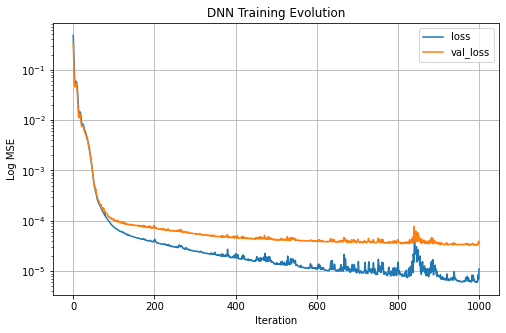

In [ ]:
#DNN with 3 layers, 100 neurons each, relu function, adam optimizer with 1000 epochs
nodes37 = 100
model37 = Sequential()

model37.add(Dense(nodes37, activation='relu', input_dim=X2_scaled_train.shape[1]))

for i in range(5):
  model37.add(Dense(nodes37, activation='relu'))

# output layer is the same as the single NN
model37.add(Dense(1))
model37.add(Activation(custom_activation))

# compile and fit the model
model37.compile(loss='mse', optimizer='adam') # optimizer = 'rmsprop', 'sgd', 'adam'
history = model37.fit(X2_scaled_train, y2_train, batch_size=512, epochs=1000, validation_split=0.2, verbose=2,
                          validation_data=(X2_scaled_val, y2_val))
print()
print(model37.summary())


pd.DataFrame(history.history).plot(figsize=(8,5), logy=True)
plt.title('DNN Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)